<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem" data-toc-modified-id="Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Creating-the-Dataset" data-toc-modified-id="Creating-the-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating the Dataset</a></span></li><li><span><a href="#Checking-Data-Integrity" data-toc-modified-id="Checking-Data-Integrity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking Data Integrity</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Train/Test/Split" data-toc-modified-id="Train/Test/Split-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Train/Test/Split</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#ERROR" data-toc-modified-id="ERROR-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>ERROR</a></span></li><li><span><a href="#Bodyfat" data-toc-modified-id="Bodyfat-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Bodyfat</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regresssion" data-toc-modified-id="Linear-Regresssion-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Linear Regresssion</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#XgB-Regressor" data-toc-modified-id="XgB-Regressor-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>XgB Regressor</a></span></li></ul></li></ul></div>

## Problem

   Knowing one's total proportion of body fat is beneficial both from a health standpoint as well as a cosmetic standpoint. The two most accurate forms of this measurement are through use of a DEXA scanner and/or hydrostatic weighing. Both of those processes are expense and time consuming for the average individual. By using information about patients that have performed those tests, we may be able to find a commonality among these variables that will assist us in making a more affordable and accessible, but still fairly accurate, estimation of a persons body fat percentage. Current algorithms based on easily accessed data are considered only slightly accurate across the population as a whole, but wildly inaccurate to an individual. 

In [515]:
## Based on the research I have acquired, frame size has a positive correlation to TBF and FFM... Can we improve the current 
## measure of body fat based on bmi or specific measurements by incorporating the frame size into those calculations?

## Introduction

The data set acquired is taken from 252 adult male samples. That being said, any predictions created from it, will likely only apply to the adult male population. I believe it potentially important to create separate models based on gender, and possibly other unforeseen factors to arrive at an estimation of the desired accuracy based on the individual rather than across the population. Each sample in this set has had their total body fat measured through hydrostatic weighing. Density is the resulting column (X*X). With that value it has been plugged into two separate formulas to calculate the proportion (Siri & Brozek) Brozek has shown to be more accurate used on samples that have not had any recent weight fluctuations. 

(I will be using the Brozek Formula, after reviewing the data, Siri dipped into the negatives)

## Creating the Dataset

In [627]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import math
import numpy as np
import seaborn as sn
pd.set_option('display.max_columns', None)

In [628]:
#Importing the main dataset
df = pd.read_csv('Bodyfat.csv')

In [518]:
#Importing an additional dataset with more features to add to the original
df2 = pd.read_csv('fat.dat.txt', header=None, delimiter='\s+')

In [519]:
#Combining extra features from the additional df (df2)
df['Brozek'] = df2[1]
df['BMI'] = df2[7]
df['FFM_Brozek'] = df2[8]

In [520]:
df.head()

Density  bodyfat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  
0  37.3   21.9    32.0     27.4   17.1    12.6  23.7       134.9  
1  37.3   23.4    30.5     28.9   18.2     6.9  23.4       161.3  
2  38.9   24.0    28.8     25.2   16.6    24.6  24.7       116.0  
3  37.3   22.8    32.4     29.4   18.2    10.9  24.9       164.7  
4  42.2   24.0    32.2     27.7   17.7    27.8  25.6       133.1

In [521]:
#Renaming the bodyfat column to Siri to differenciate it from Brozek
df['Siri'] = df['bodyfat']
df.drop(['bodyfat'], axis=1, inplace=True)

In [522]:
df.head()

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  
0   21.9    32.0     27.4   17.1    12.6  23.7       134.9  12.3  
1   23.4    30.5     28.9   18.2     6.9  23.4       161.3   6.1  
2   24.0    28.8     25.2   16.6    24.6  24.7       116.0  25.3  
3   22.8    32.4     29.4   18.2    10.9  24.9       164.7  10.4  
4   24.0    32.2     27.7   17.7    27.8  25.6       133.1  28.7

## Checking Data Integrity

The minimum essential amount of body fat required for life in a male is 2-5% 

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Density     252 non-null    float64
 1   Age         252 non-null    int64  
 2   Weight      252 non-null    float64
 3   Height      252 non-null    float64
 4   Neck        252 non-null    float64
 5   Chest       252 non-null    float64
 6   Abdomen     252 non-null    float64
 7   Hip         252 non-null    float64
 8   Thigh       252 non-null    float64
 9   Knee        252 non-null    float64
 10  Ankle       252 non-null    float64
 11  Biceps      252 non-null    float64
 12  Forearm     252 non-null    float64
 13  Wrist       252 non-null    float64
 14  Brozek      252 non-null    float64
 15  BMI         252 non-null    float64
 16  FFM_Brozek  252 non-null    float64
 17  Siri        252 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 35.6 KB


In [524]:
#creating a list and function to gather all potential outliers and frame for quicker review
review_list = []

def list_creator(list):
    for x in list:
        review_list.append(x)
    return review_list

In [525]:
for x in list(df.columns):
    print(x, df[x].max(), df[x].min(), round(df[x].mean(), 2))    
#Density too High (cannot be over 1.1)
#Height too low (2 ft. 5.5 inches)
#Brozek too low (cannot have 0% bodyfat)
#Siri too low (cannot have 0% bodyfat)


Density 1.1089 0.995 1.06
Age 81 22 44.88
Weight 363.15 118.5 178.92
Height 77.75 29.5 70.15
Neck 51.2 31.1 37.99
Chest 136.2 79.3 100.82
Abdomen 148.1 69.4 92.56
Hip 147.7 85.0 99.9
Thigh 87.3 47.2 59.41
Knee 49.1 33.0 38.59
Ankle 33.9 19.1 23.1
Biceps 45.0 24.8 32.27
Forearm 34.9 21.0 28.66
Wrist 21.4 15.8 18.23
Brozek 45.1 0.0 18.94
BMI 48.9 18.1 25.44
FFM_Brozek 240.5 105.9 143.71
Siri 47.5 0.0 19.15


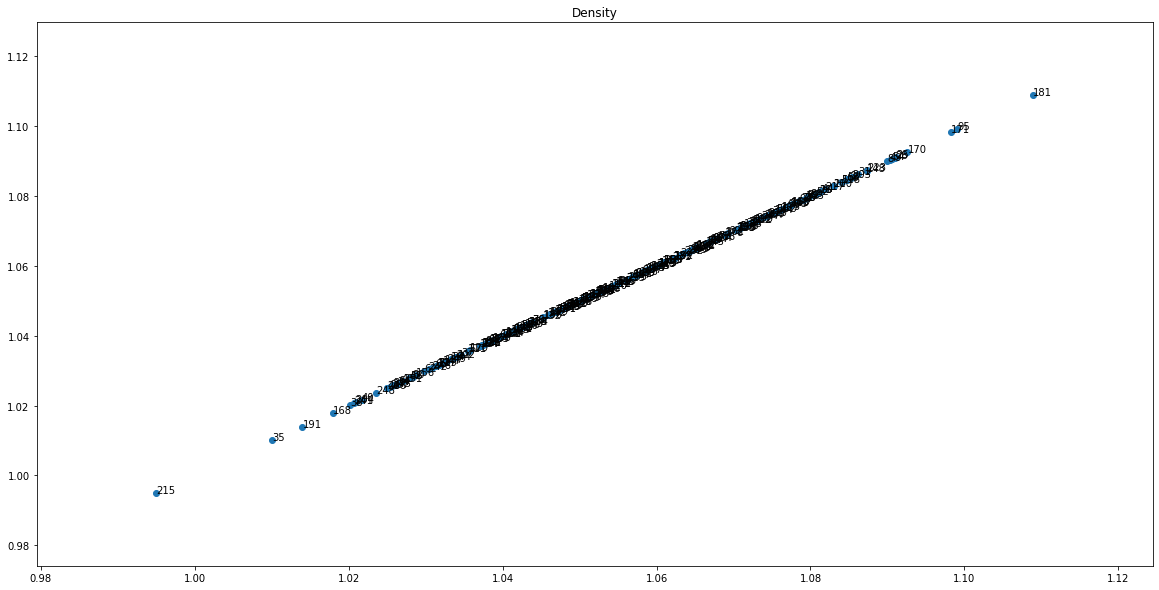

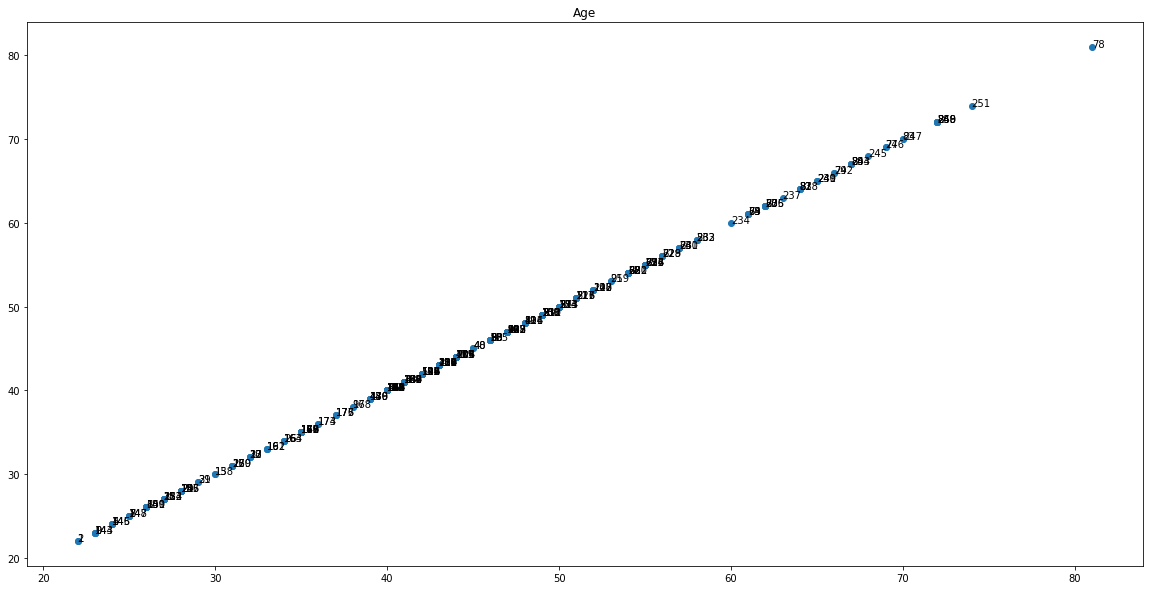

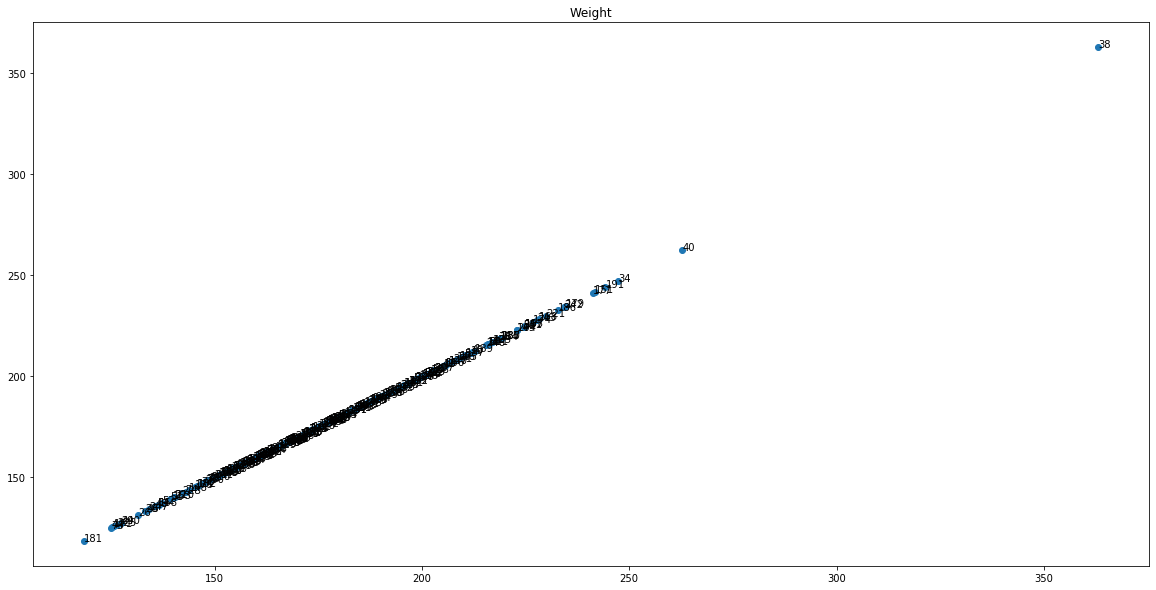

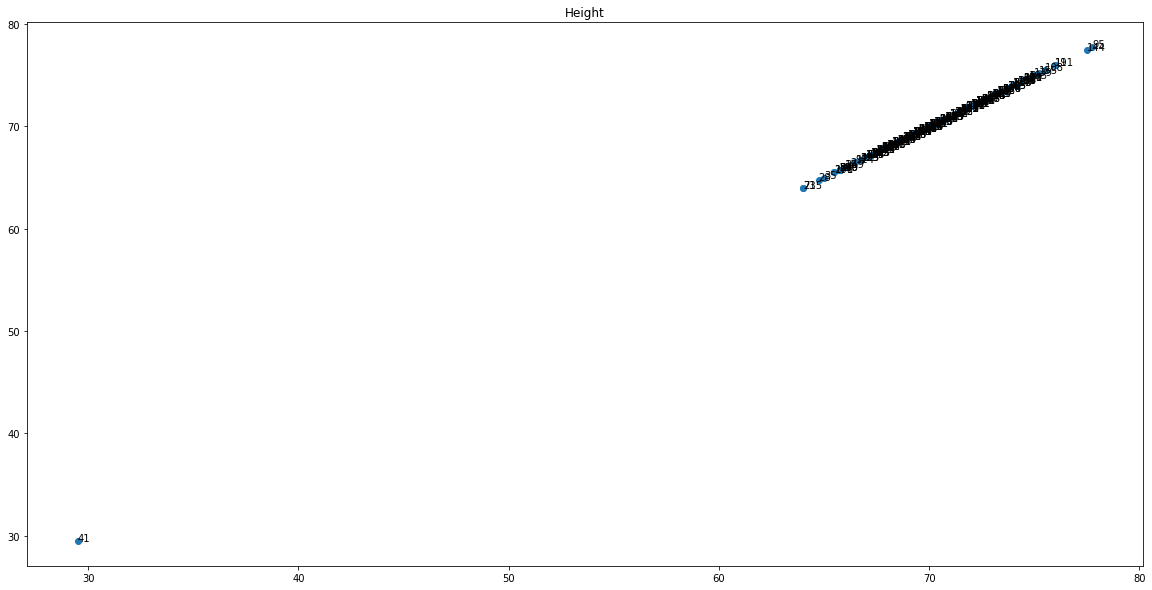

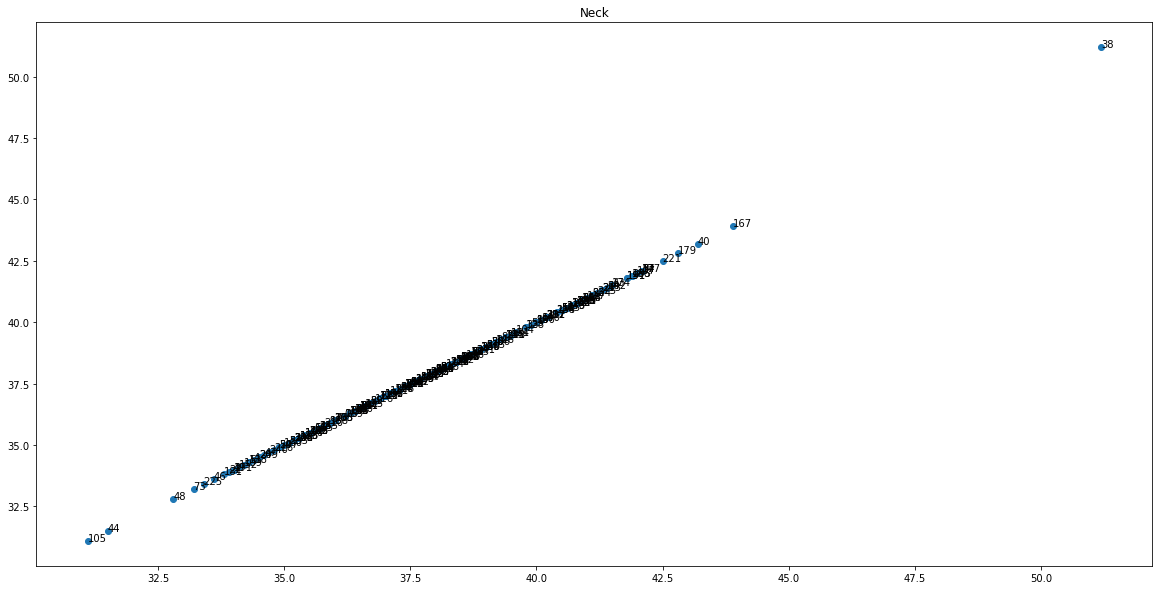

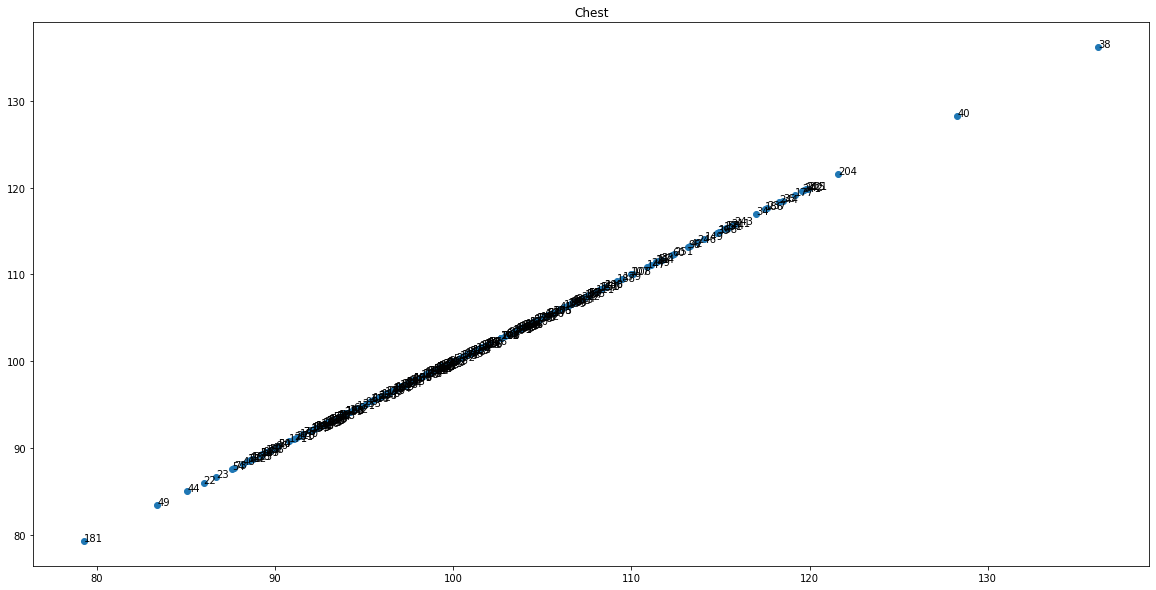

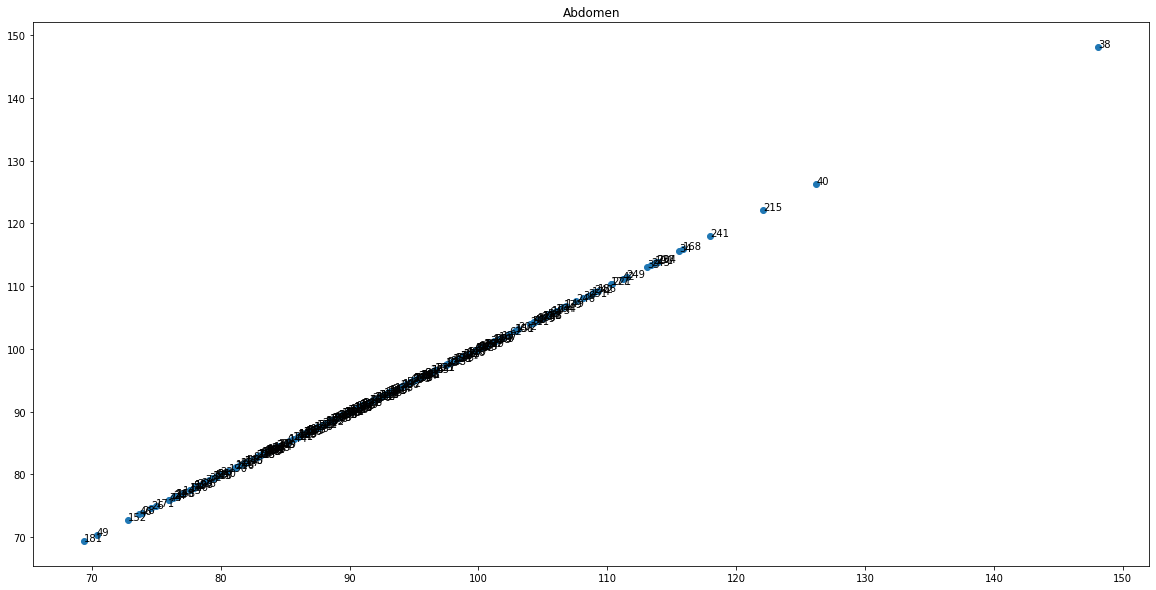

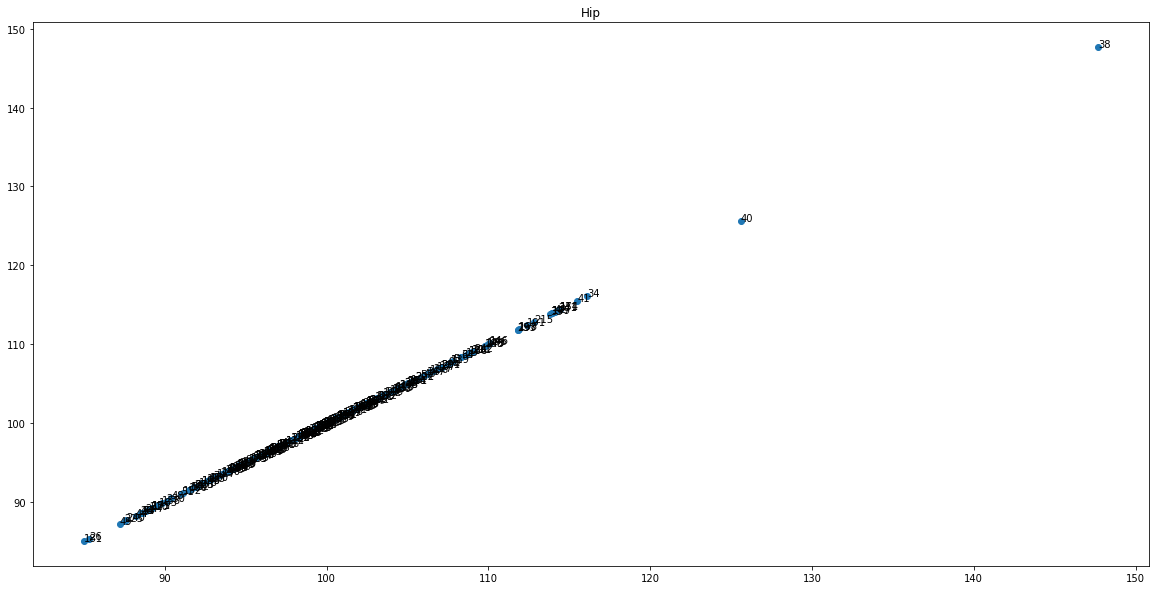

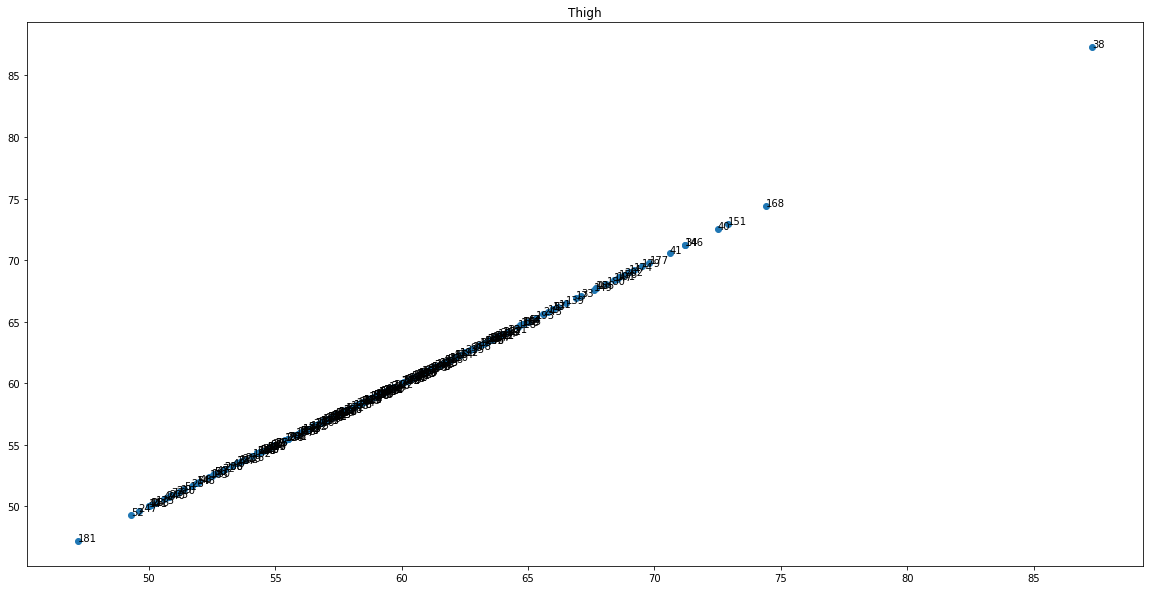

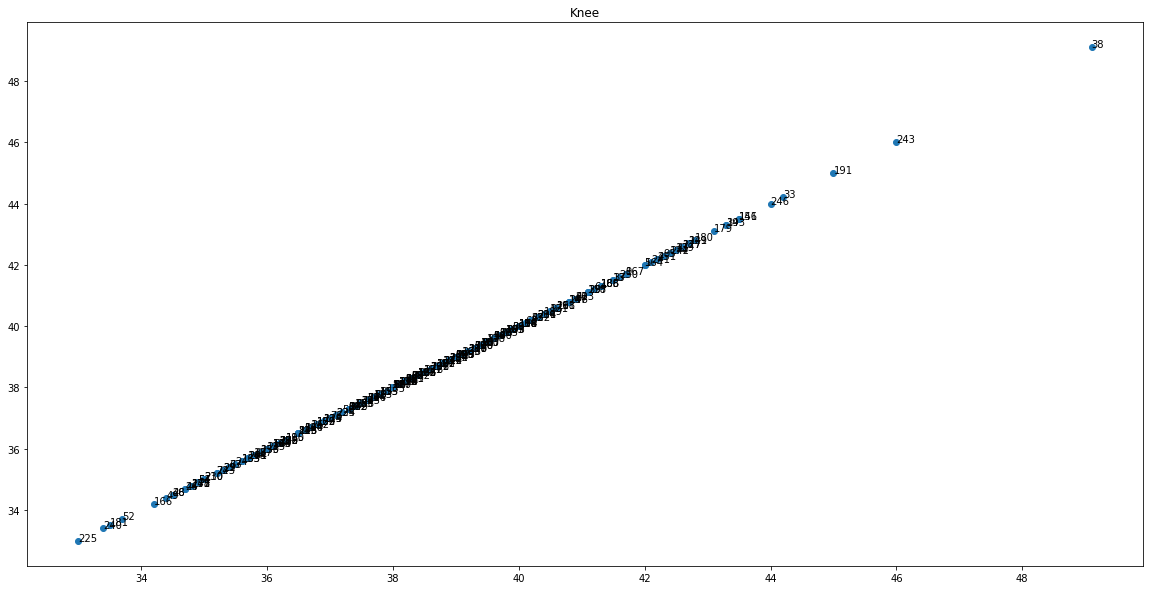

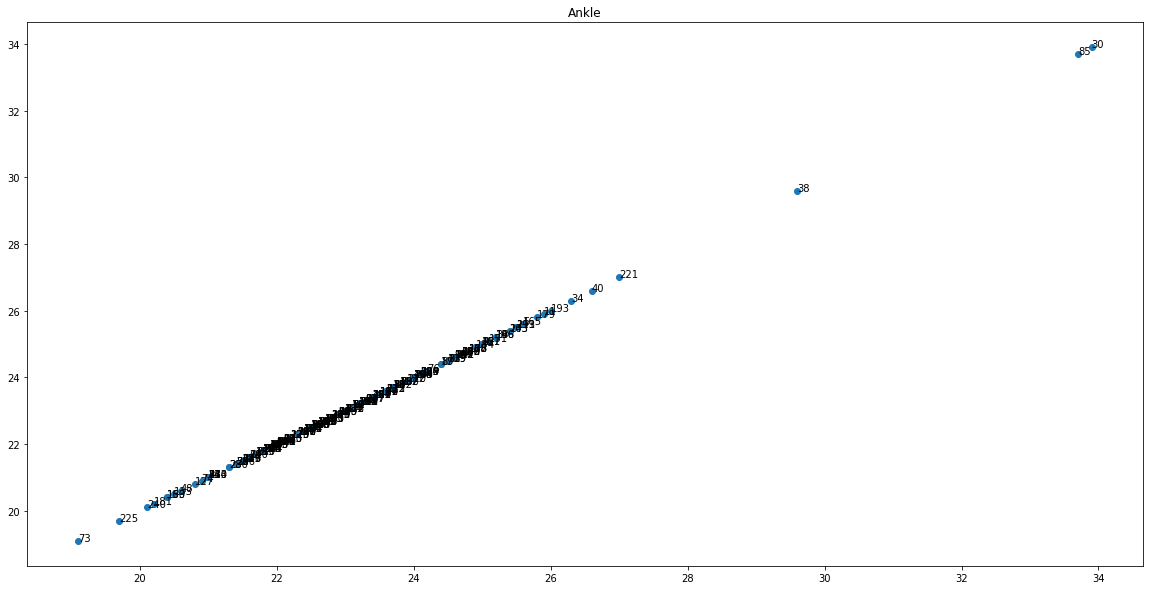

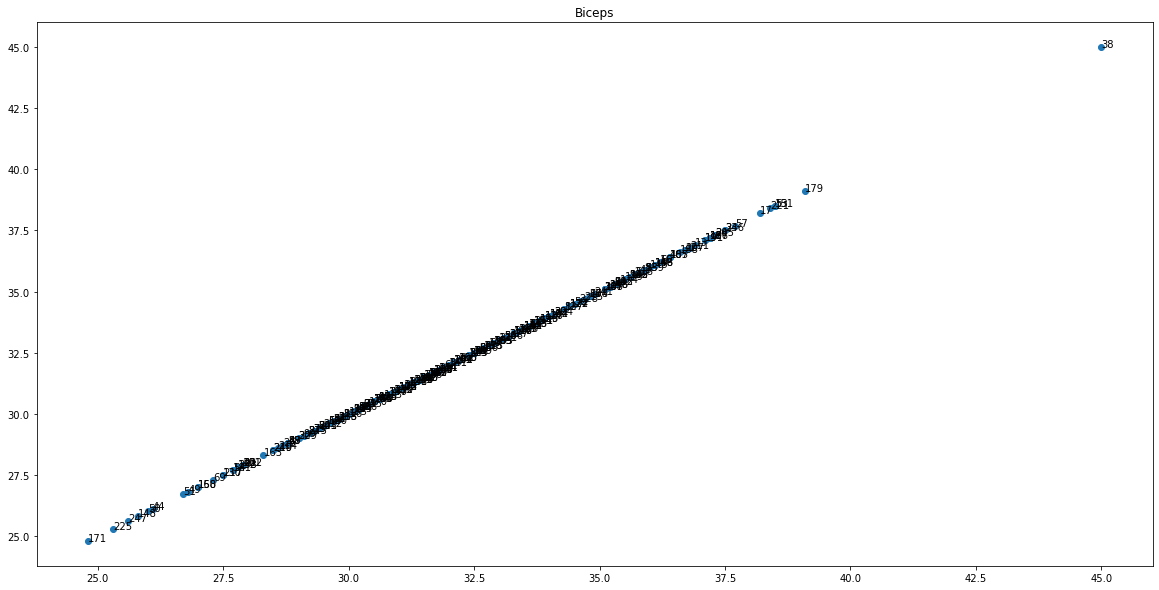

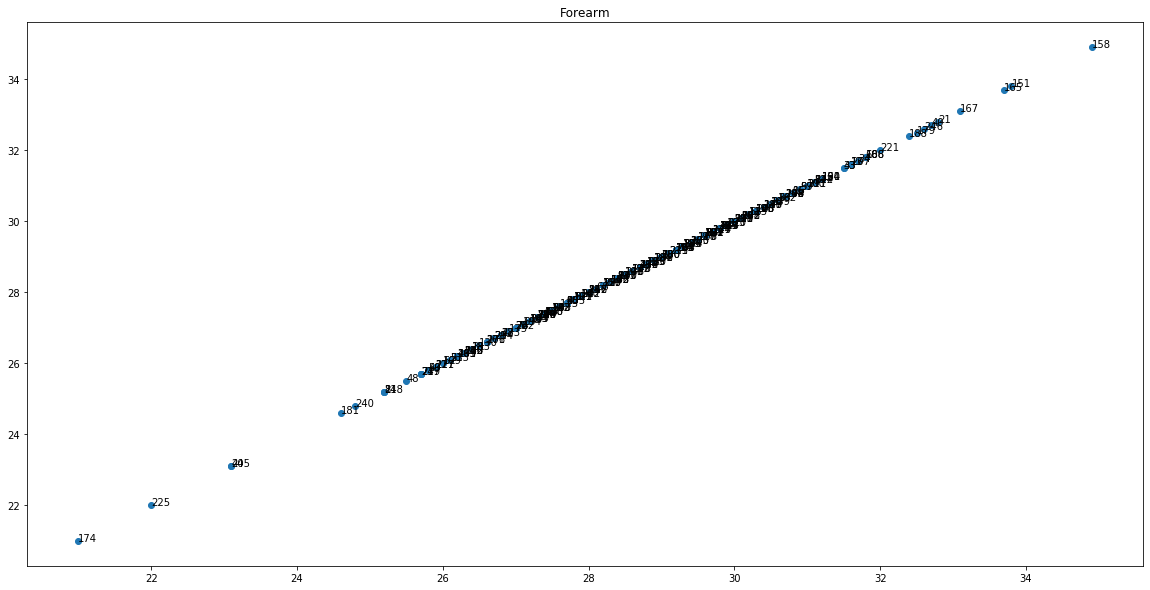

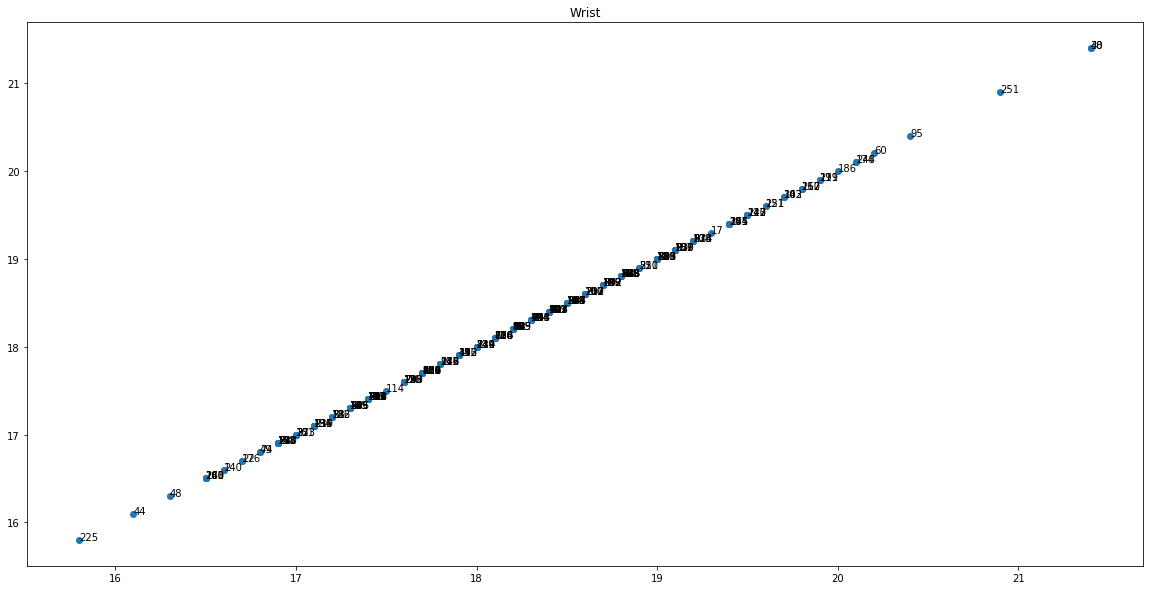

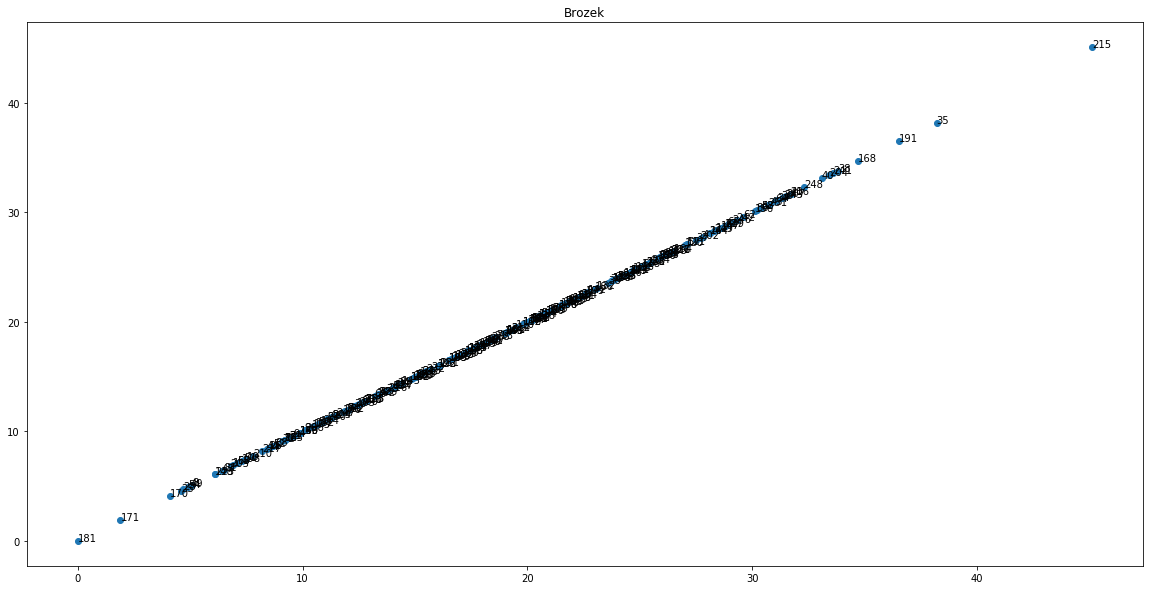

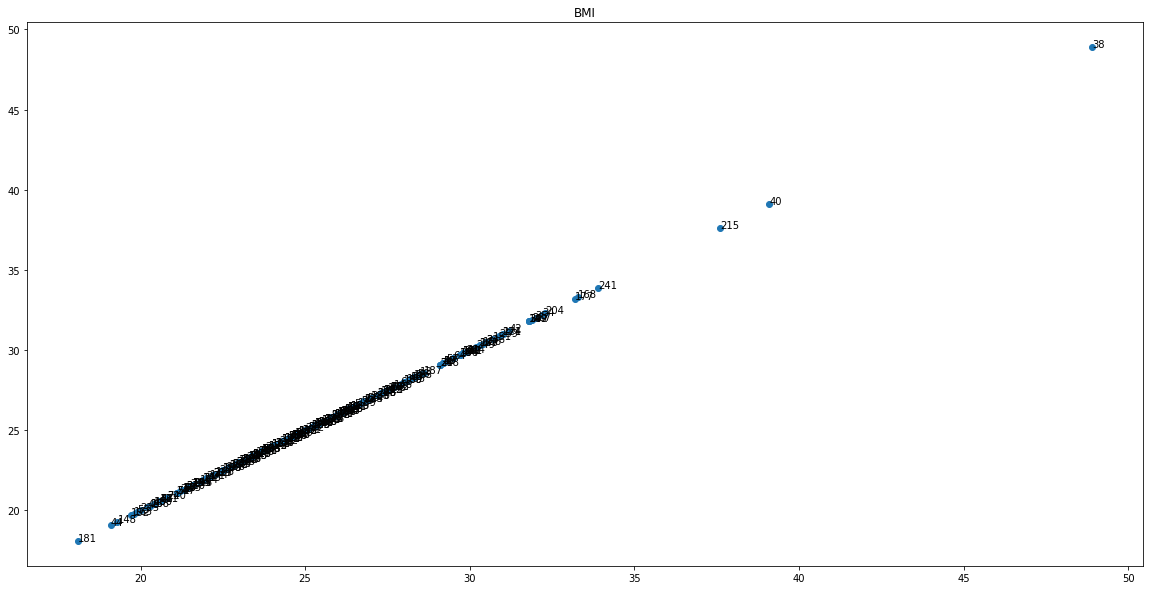

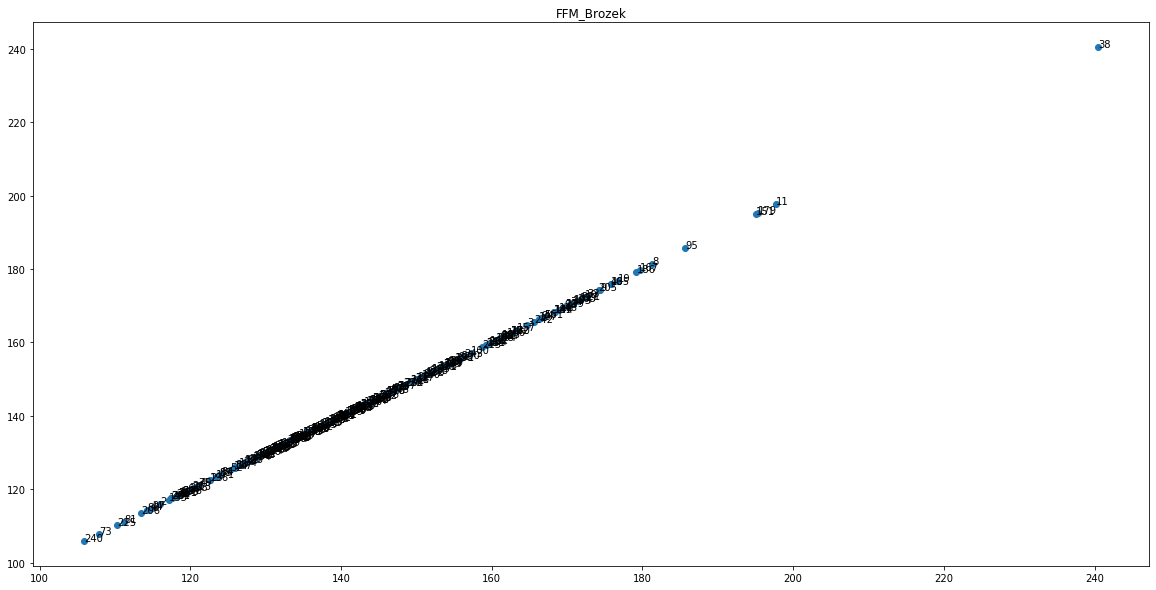

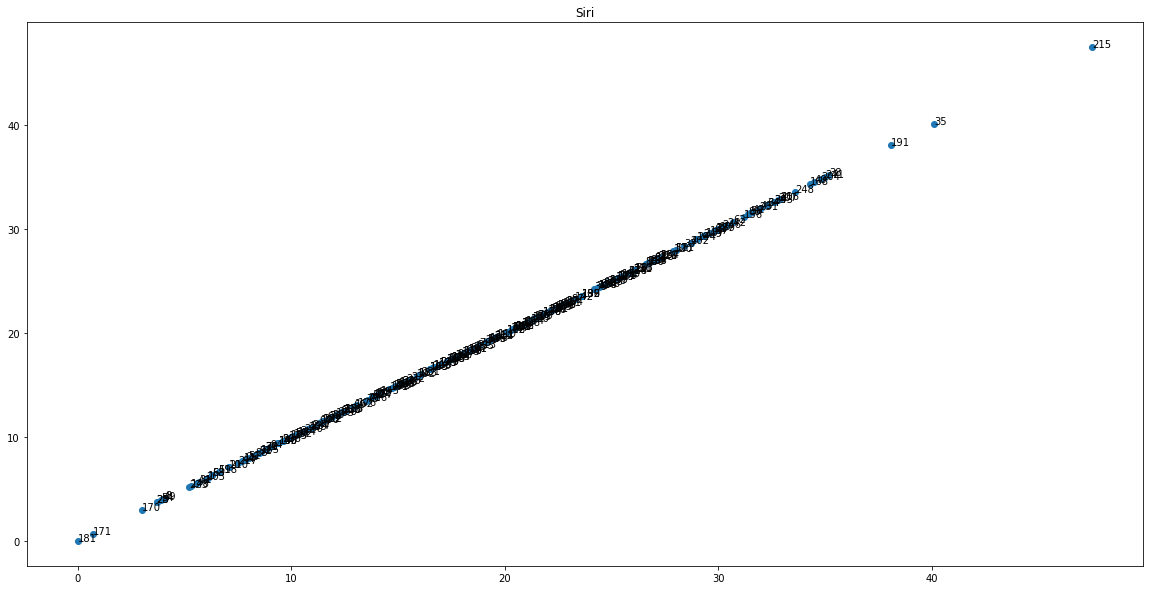

In [526]:
for x in list(df.columns):
    fig, ax = plt.subplots()
    plt.scatter(df[x], df[x])
    plt.title(x)
    for i in df.index:
        ax.annotate(i, (df[x][i], df[x][i]))
    plt.gcf().set_size_inches((20, 10))   
    plt.show();

In [527]:
# 181, 215, 191, 171, 78, 38, 41, 30, 85, 40, 168, 35 adding to list to be reviewed
list1 = [181, 215, 191, 171, 78, 38, 41, 30, 85, 40, 168, 35]
list_creator(list1)

[181, 215, 191, 171, 78, 38, 41, 30, 85, 40, 168, 35]

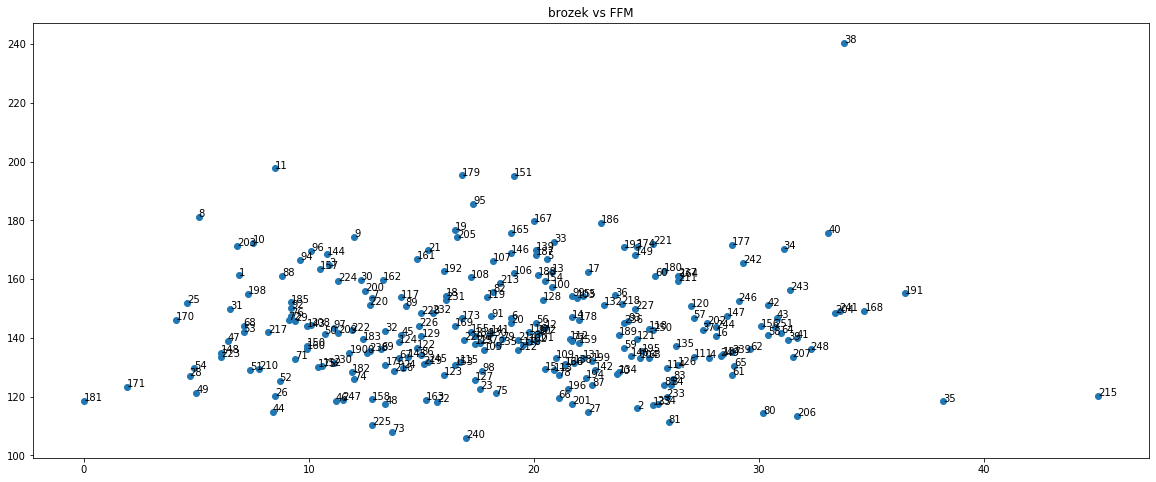

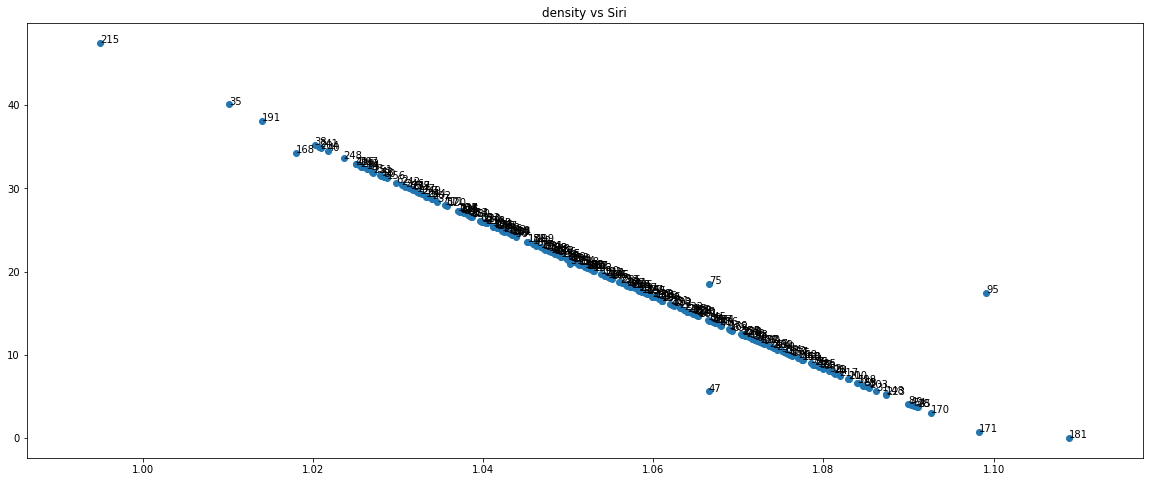

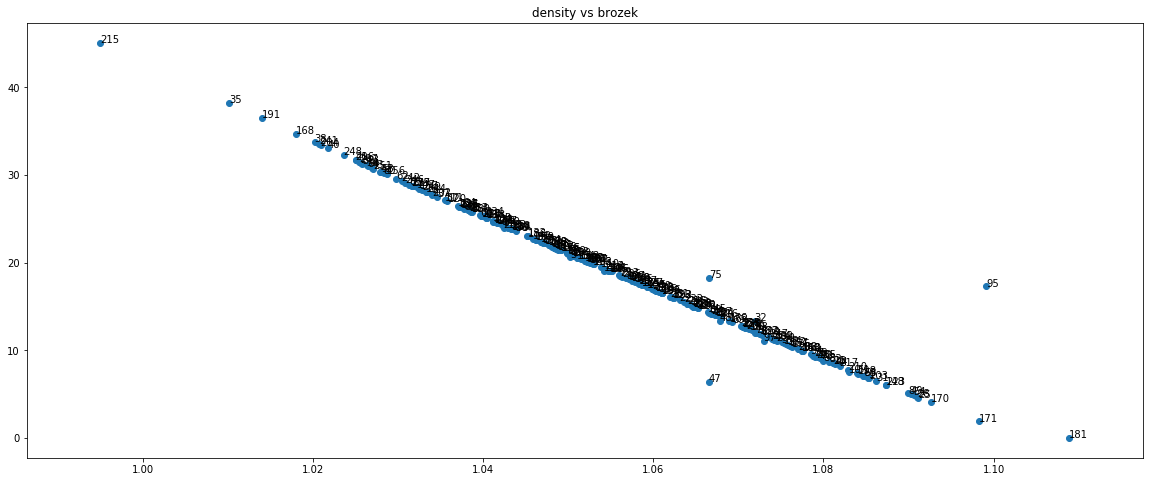

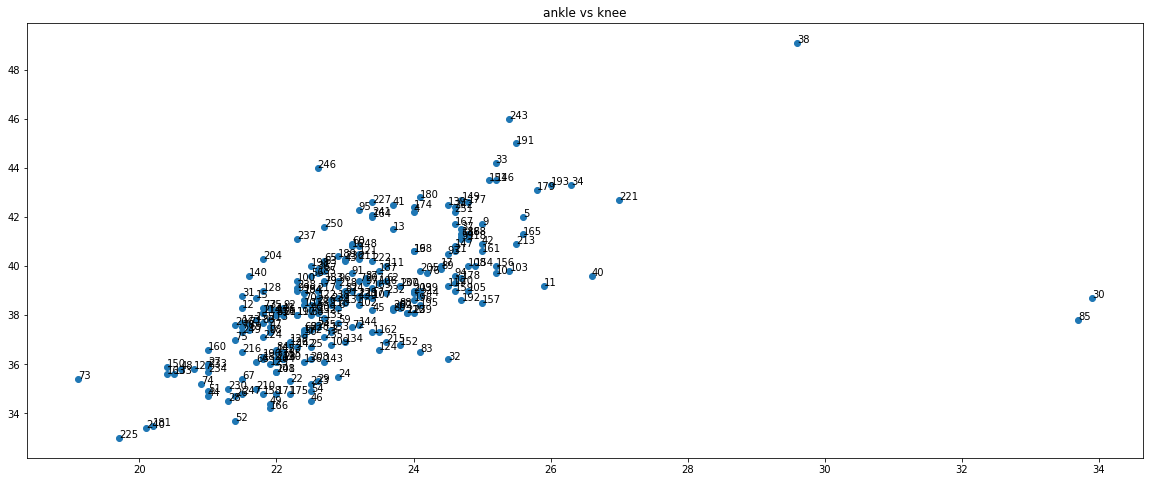

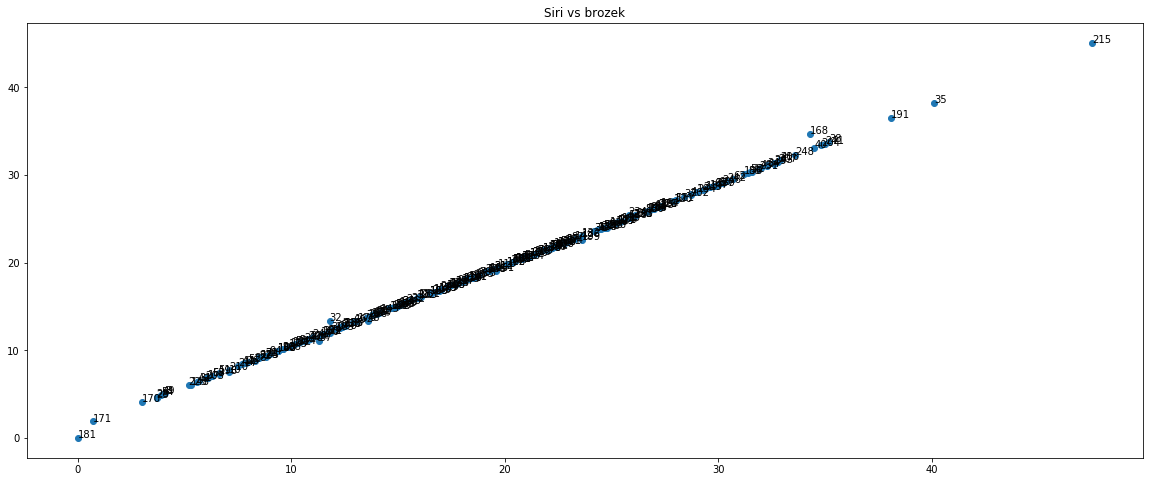

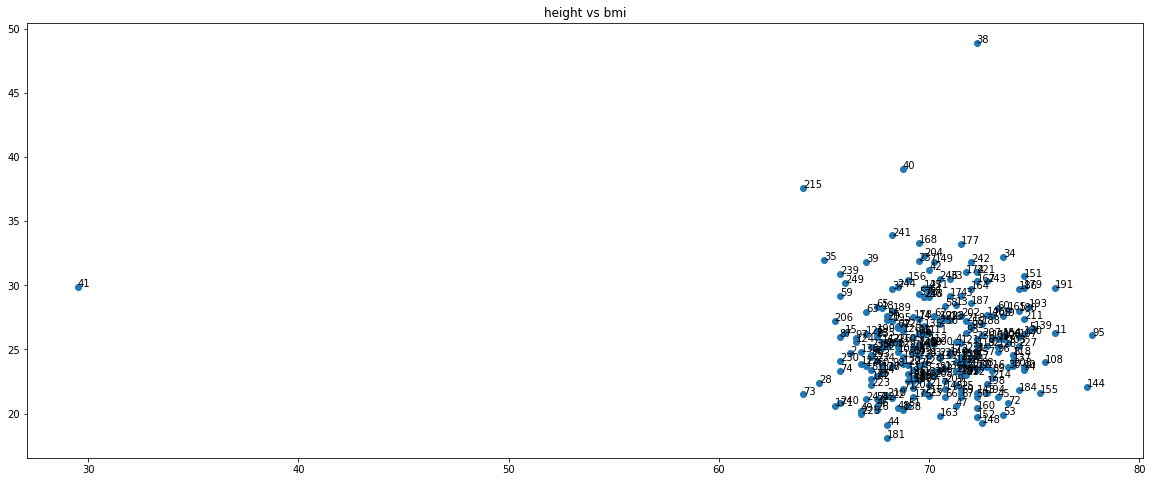

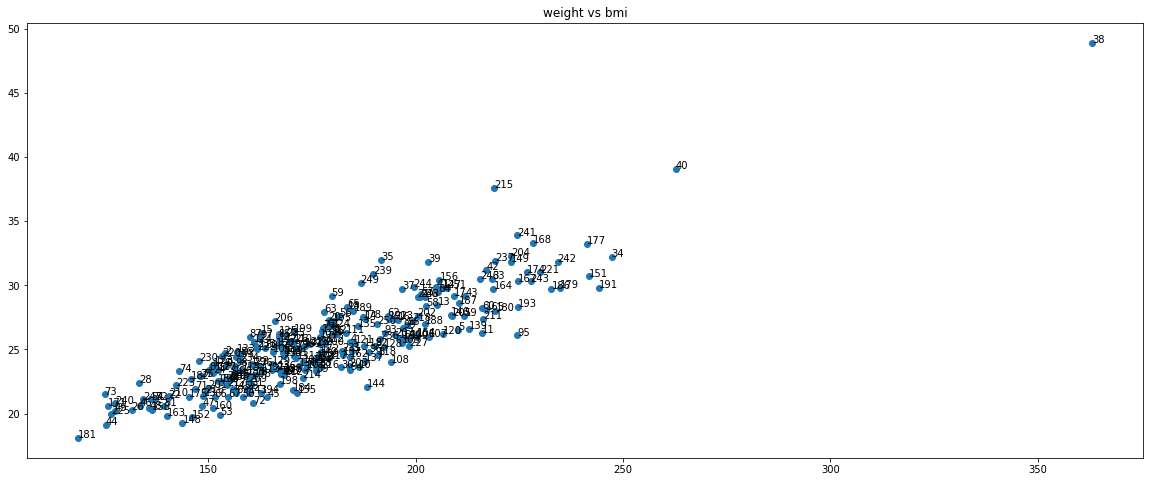

In [528]:
columns = [(df['Brozek'], df['FFM_Brozek']), (df['Density'], df['Siri']), (df['Density'], df['Brozek']),
          (df['Ankle'], df['Knee']), (df['Siri'], df['Brozek']), (df['Height'], df['BMI']), (df['Weight'], df['BMI'])]
column_names = ['brozek vs FFM', 'density vs Siri', 'density vs brozek', 'ankle vs knee', 'Siri vs brozek', 'height vs bmi', 'weight vs bmi']

total = 0
for z in columns:
    total2 = 0
    list1 = []
    list2 = []
    for i in z[0]:
        list1.append(i)
    for i in z[1]:
        list2.append(i)
    list3 = zip(list1, list2)
    fig, ax = plt.subplots(figsize=(20,8))
    plt.title(column_names[total])
    total += 1
    ax.scatter(z[0], z[1])
    for x,y in list3:
        ax.annotate(total2, (x, y))
        total2 += 1
    plt.show();

In [529]:
#38, 215, 95, 47 add to review list
list2 = [38, 215, 95, 47, 168, 32]
list_creator(list2)

[181, 215, 191, 171, 78, 38, 41, 30, 85, 40, 168, 35, 38, 215, 95, 47, 168, 32]

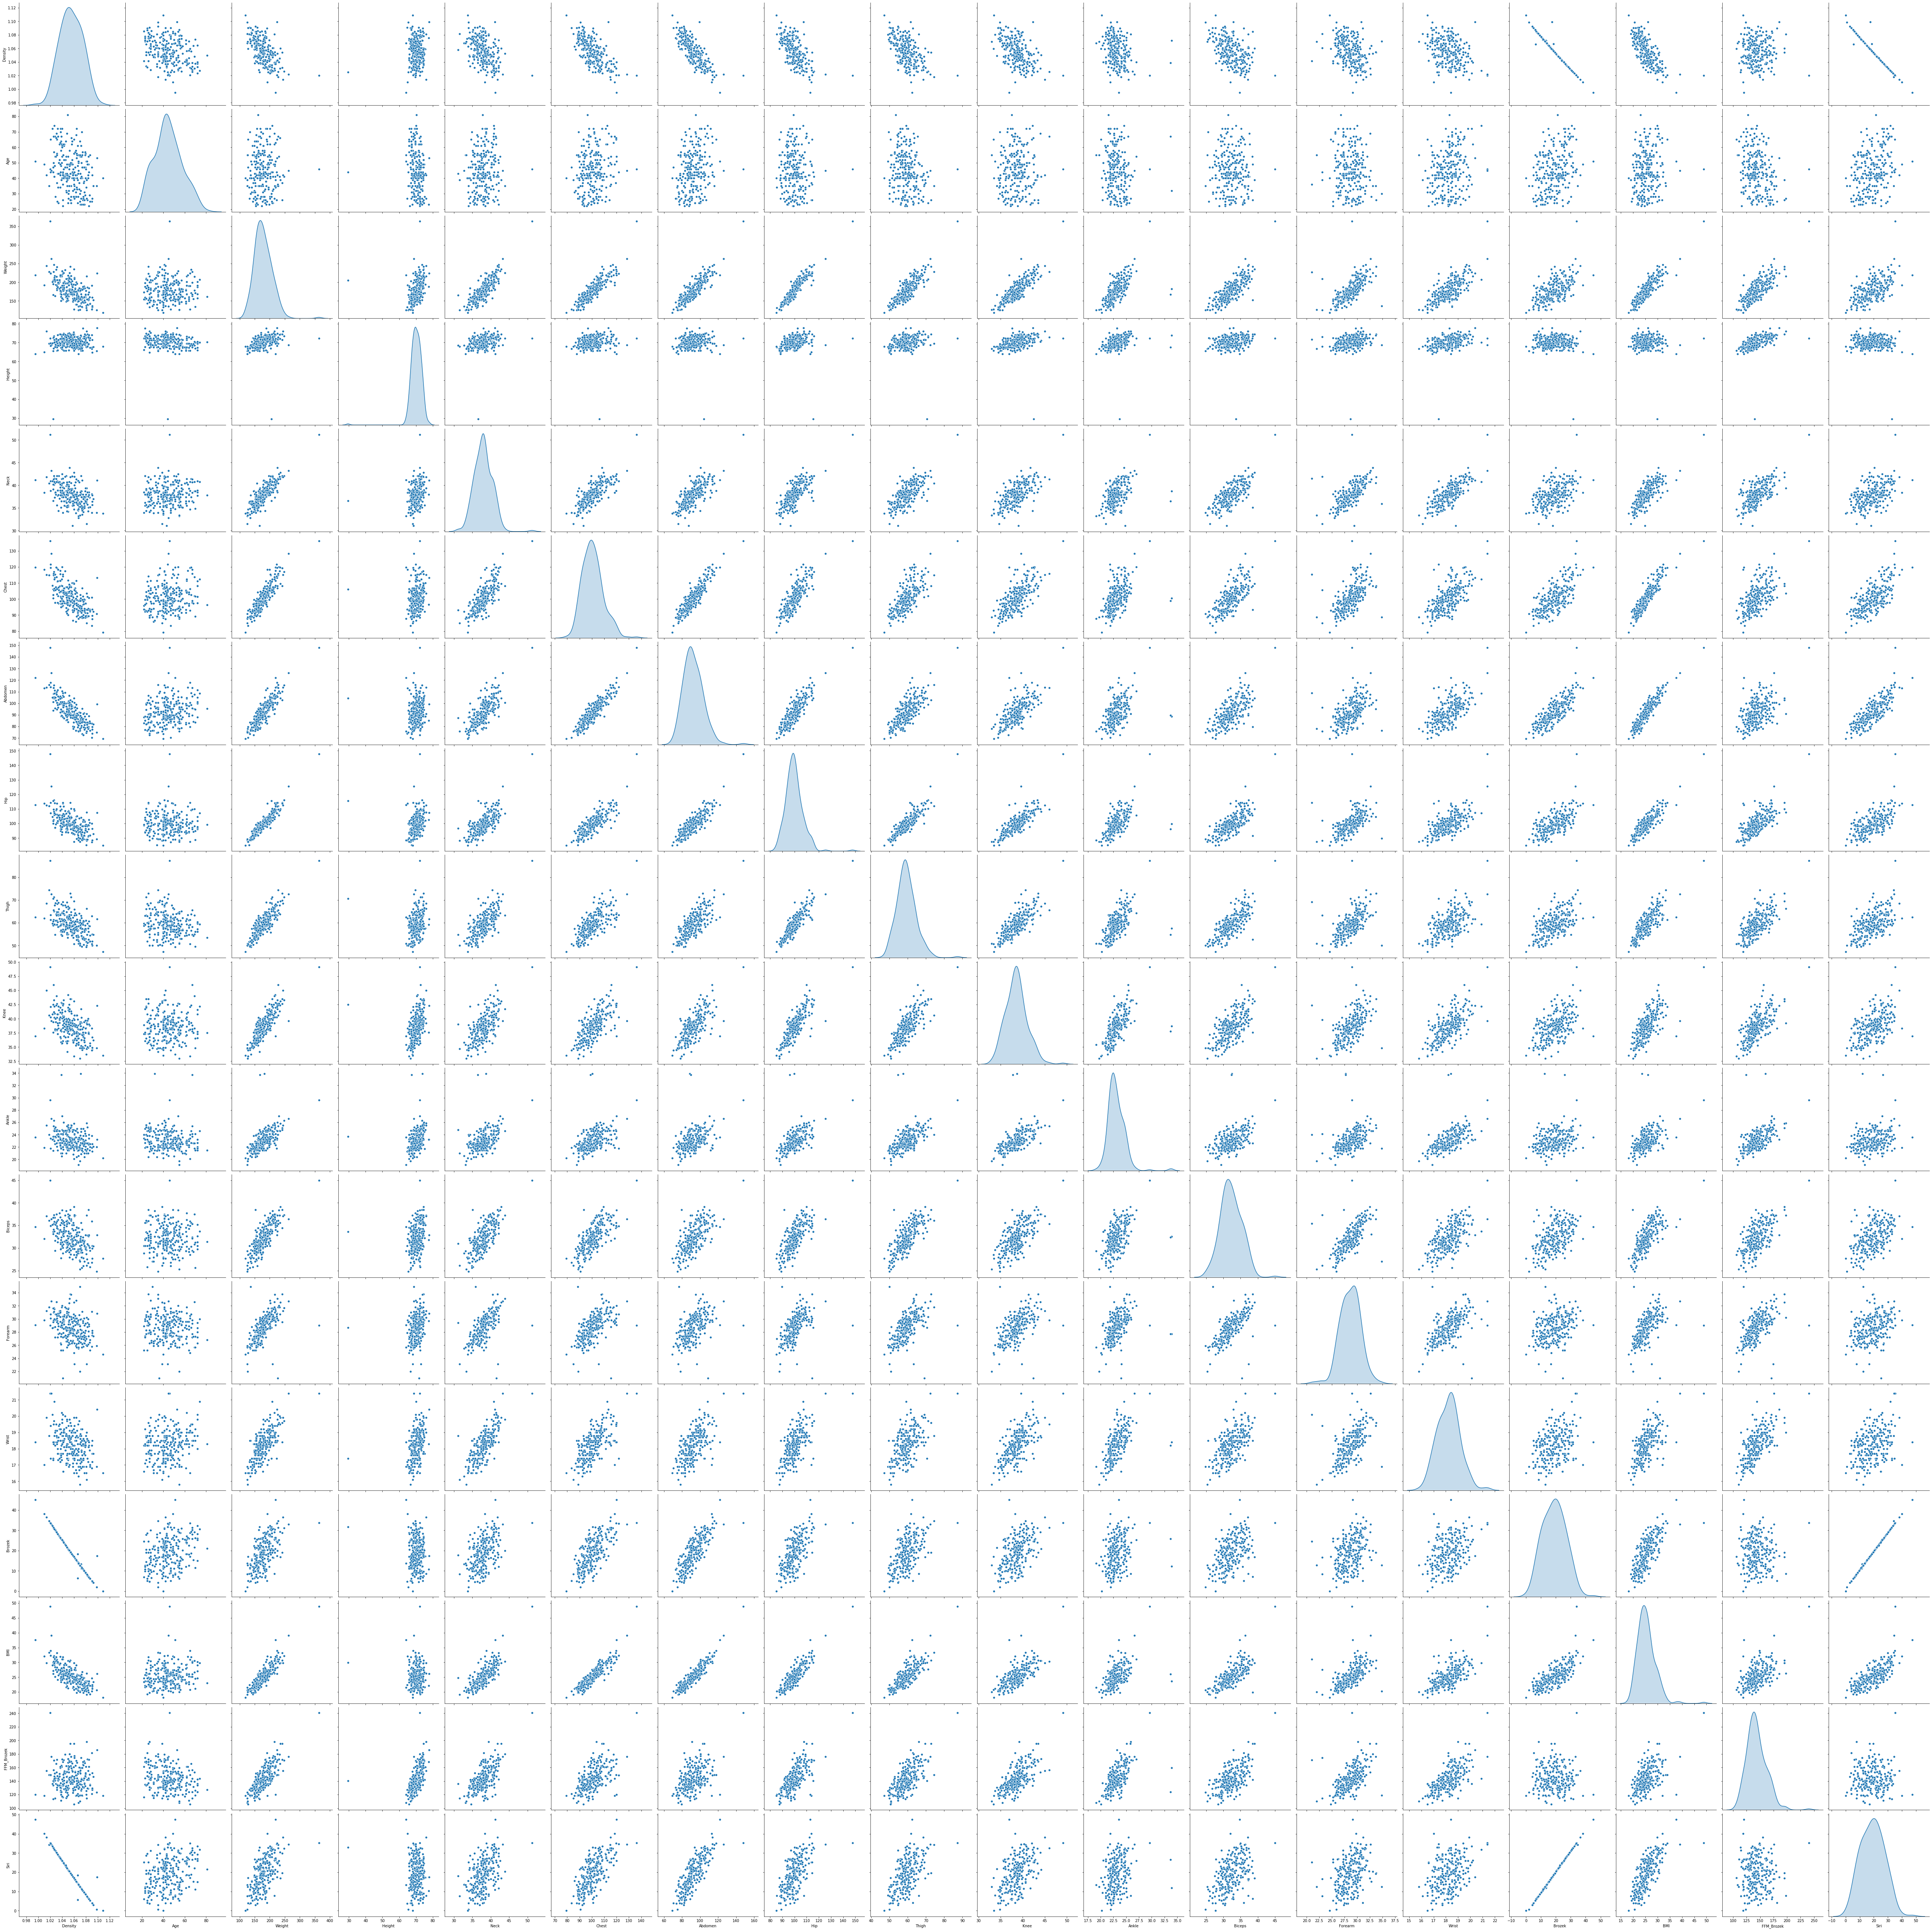

In [530]:
sn.pairplot(df, diag_kind = 'kde', height=4);
plt.show();

In [531]:
# Ankle greater than 30 (2 samples have much larger ankles than even the heaviest weighing sample)
# FFM larger than 220 (extreme outlier)

In [532]:
print(df[df['Ankle'] > 30]) #30, 85, 
print(df[df['FFM_Brozek'] > 220]) #38
print(df[df['Age'] > 80]) #78 (out of population sample),
print(df[df['Brozek'] < 3]) #181, 171 (cannot live with less than 2-5% BF and these men are older)
print(df[df['Height'] < 60]) #41 (unrealistic height)
print(df[df['Weight'] > 300]) #38 (extremely obese, out of population sample))

    Density  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  Knee  \
30   1.0716   32   182.0   73.75  38.7  100.5     88.7  99.8   57.5  38.7   
85   1.0386   67   167.0   67.50  36.5   98.9     89.7  96.2   54.7  37.8   

    Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  
30   33.9    32.5     27.7   18.4    12.3  23.6       159.7  11.9  
85   33.7    32.4     27.7   18.2    25.8  26.0       123.9  26.6  
    Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
38   1.0202   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   

    Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  
38   29.6    45.0     29.0   21.4    33.8  48.9       240.5  35.2  
    Density  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  Knee  \
78   1.0498   81  161.25   70.25  37.8   96.4     95.4  99.3   53.5  37.5   

    Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  
78   21.5    31.4     26.8   18.3    21.1  23.0 

In [533]:
list3 = [30,85,78, 38,181,187, 41,38]
list_creator(list3)

[181,
 215,
 191,
 171,
 78,
 38,
 41,
 30,
 85,
 40,
 168,
 35,
 38,
 215,
 95,
 47,
 168,
 32,
 30,
 85,
 78,
 38,
 181,
 187,
 41,
 38]

In [534]:
#samples that have been marked as incorrect BF calculations by the person uploaded this dataset
list4 = [48,76,96]
list_creator(list4)

[181,
 215,
 191,
 171,
 78,
 38,
 41,
 30,
 85,
 40,
 168,
 35,
 38,
 215,
 95,
 47,
 168,
 32,
 30,
 85,
 78,
 38,
 181,
 187,
 41,
 38,
 48,
 76,
 96]

In [535]:
#Function to frame all samples for review
def review(list, df, new_df):
    z = set(list)
    extra_df = pd.DataFrame()
    for x in z:
        a = df.loc[x]
        b = pd.DataFrame(a)
        frames = [extra_df, b]
        extra_df = pd.concat(frames, axis=1)
    return extra_df.T

In [536]:
review_df = pd.DataFrame()
review_df = review(review_list, df, review_df)
review_df

Density   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
32    1.0719  27.0  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   
96    1.0770  38.0  188.75   73.25  37.5   99.1     91.6  102.4   60.6  39.4   
35    1.0101  49.0  191.75   65.00  38.4  118.5    113.1  113.8   61.9  38.3   
38    1.0202  46.0  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   
40    1.0217  45.0  262.75   68.75  43.2  128.3    126.2  125.6   72.5  39.6   
41    1.0250  44.0  205.00   29.50  36.6  106.0    104.3  115.5   70.6  42.5   
168   1.0180  35.0  228.25   69.50  40.4  114.9    115.9  111.9   74.4  40.6   
171   1.0983  35.0  125.75   65.50  34.0   90.8     75.0   89.2   50.0  34.8   
76    1.0790  57.0  162.50   69.50  38.7   91.6     78.8   94.3   56.7  39.7   
78    1.0498  81.0  161.25   70.25  37.8   96.4     95.4   99.3   53.5  37.5   
47    1.0665  39.0  148.50   71.25  34.6   89.8     79.5   92.7   52.7  37.5   
48    1.0678  45.0  135.75   68.50  32.8   92.3     83.4   90.4   52.0  35.8   
95    1.0991  53.0  224.50   77.75  41.1  113.2     99.2  107.5   61.7  42.3   
181   1.1089  40.0  118.50   68.00  33.8   79.3     69.4   85.0   47.2  33.5   
85    1.0386  67.0  167.00   67.50  36.5   98.9     89.7   96.2   54.7  37.8   
215   0.9950  51.0  219.00   64.00  41.2  119.8    122.1  112.8   62.5  36.9   
187   1.0524  41.0  210.50   72.00  38.5  107.4     98.9  104.1   63.5  39.8   
30    1.0716  32.0  182.00   73.75  38.7  100.5     88.7   99.8   57.5  38.7   
191   1.0140  42.0  244.25   76.00  41.8  115.2    113.7  112.4   68.5  45.0   

     Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  
32    24.5    29.0     30.0   18.8    13.4  23.3       142.5  11.8  
96    22.9    31.6     30.1   18.5    10.1  24.8       169.6   9.6  
35    21.9    32.0     29.8   17.0    38.2  32.0       118.4  40.1  
38    29.6    45.0     29.0   21.4    33.8  48.9       240.5  35.2  
40    26.6    36.4     32.7   21.4    33.1  39.1       175.8  34.5  
41    23.7    33.6     28.7   17.4    31.7  29.9       140.1  32.9  
168   24.0    36.1     31.8   18.8    34.7  33.3       149.3  34.3  
171   22.0    24.8     25.9   16.9     1.9  20.6       123.4   0.7  
76    24.2    30.2     29.2   18.1     9.2  23.7       147.5   8.8  
78    21.5    31.4     26.8   18.3    21.1  23.0       127.2  21.5  
47    21.9    28.8     26.8   17.9     6.4  20.6       139.0   5.6  
48    20.6    28.8     25.5   16.3    13.4  20.4       117.6  13.6  
95    23.2    32.9     30.8   20.4    17.3  26.1       185.7  17.4  
181   20.2    27.7     24.6   16.5     0.0  18.1       118.5   0.0  
85    33.7    32.4     27.7   18.2    25.8  26.0       123.9  26.6  
215   23.6    34.7     29.1   18.4    45.1  37.6       120.2  47.5  
187   23.5    36.4     30.4   19.1    20.1  28.6       168.3  20.4  
30    33.9    32.5     27.7   18.4    12.3  23.6       159.7  11.9  
191   25.5    37.1     31.2   19.9    36.5  29.8       155.2  38.1

In [537]:
drop_list = [181, 171, 41, 215, 35, 40,  168, 30, 78, 38, 48, 76, 96]
review_df.drop(drop_list, axis=0, inplace=True)

In [538]:
df.drop(drop_list, axis=0, inplace=True)

Density   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
32    1.0719  27.0  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   
47    1.0665  39.0  148.50   71.25  34.6   89.8     79.5   92.7   52.7  37.5   
95    1.0991  53.0  224.50   77.75  41.1  113.2     99.2  107.5   61.7  42.3   
85    1.0386  67.0  167.00   67.50  36.5   98.9     89.7   96.2   54.7  37.8   
187   1.0524  41.0  210.50   72.00  38.5  107.4     98.9  104.1   63.5  39.8   
191   1.0140  42.0  244.25   76.00  41.8  115.2    113.7  112.4   68.5  45.0   

     Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  
32    24.5    29.0     30.0   18.8    13.4  23.3       142.5  11.8  
47    21.9    28.8     26.8   17.9     6.4  20.6       139.0   5.6  
95    23.2    32.9     30.8   20.4    17.3  26.1       185.7  17.4  
85    33.7    32.4     27.7   18.2    25.8  26.0       123.9  26.6  
187   23.5    36.4     30.4   19.1    20.1  28.6       168.3  20.4  
191   25.5    37.1     31.2   19.9    36.5  29.8       155.2  38.1

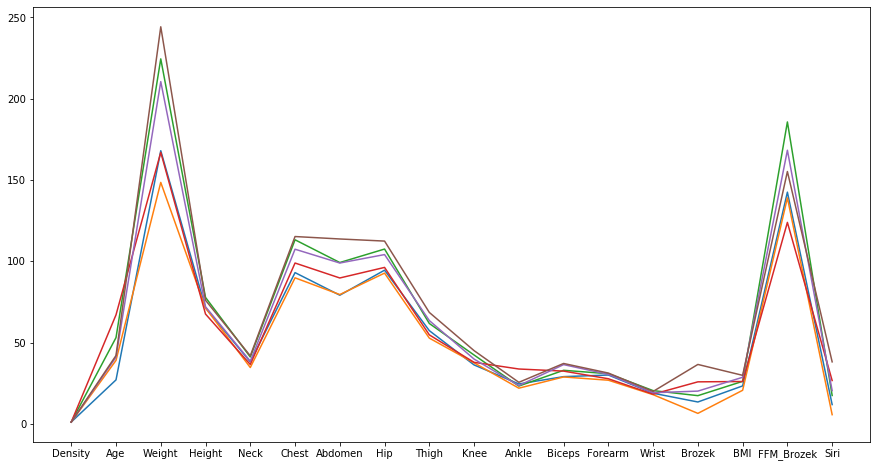

In [539]:
fig = plt.figure(figsize=(15,8))
index = list(review_df.index)
for x in index:
    plt.plot(review_df.loc[x])
review_df

In [540]:
## 171 and 181 have estimated bf percentages lower than 2%, which is required for life. I can either remove these as inaccurate or test a model 
## increasing the estimate bf by 2 for all. I would like to find the measurements responsible for the inaccuracies and maybe remove or alter
## them for a model.

In [541]:
## Should I remove the two Obese measurements? With there only being 2 will it negatively impact my model?

In [542]:
## check all density within a certain range

## Feature Engineering

In [543]:
## the formula used by the DoD is 86.010 x log10(abdomen - neck) - 70.041 x log10(height) + 36.76
# Creating a copy dataset only including the 3 variables used in the DOD measurement 
# Im going to change the measurements to inches for the equation
df3 = df[['Height', 'Neck', 'Abdomen']].copy()

df3['Neck'] = df3['Neck'] * 0.393701
df3['Abdomen'] = df3['Abdomen'] * 0.393701

df3

Height       Neck    Abdomen
0     67.75  14.251976  33.543325
1     72.25  15.157489  32.677183
2     66.25  13.385834  34.606318
3     72.25  14.724417  34.015766
4     71.25  13.543314  39.370100
..      ...        ...        ...
247   67.00  13.740165  32.913404
248   69.75  16.102371  41.338605
249   66.00  15.314969  43.897662
250   70.50  15.314969  39.881911
251   70.00  16.063001  42.716559

[239 rows x 3 columns]

In [544]:
#Using the DoD formula against all samples to create a list of body fat percentages and then adding it as a column to df3

bf = []
ans1 = []
ans2 = []

for x in df3['Height']:
    ans2.append(np.log10(x))

for x in df3['Abdomen']:
    for y in df3['Neck']:
        ans1.append(np.log10(x-y))
        
answers = zip(ans1, ans2)

for x, y in answers:
    bf.append(round(86.010 * x - 70.041 * y + 36.76, 2))
print(bf)

df3['DoD_BF'] = bf
df3['Brozek'] = df['Brozek']
df3

[19.08, 15.32, 21.4, 16.19, 18.89, 13.89, 18.04, 15.77, 14.91, 11.81, 14.39, 13.06, 16.58, 15.02, 14.87, 19.72, 15.53, 12.86, 17.68, 13.58, 16.68, 14.08, 20.57, 18.61, 20.35, 17.82, 19.19, 17.15, 20.3, 18.14, 16.7, 16.07, 14.8, 11.81, 16.29, 14.06, 16.23, 17.23, 13.16, 22.38, 17.08, 21.12, 18.74, 21.17, 18.1, 19.94, 18.85, 17.43, 17.95, 14.29, 16.68, 14.87, 14.33, 18.27, 12.51, 19.2, 16.58, 18.49, 14.98, 15.42, 18.21, 16.9, 17.4, 17.36, 17.97, 16.67, 16.34, 23.03, 19.76, 19.34, 16.78, 17.48, 17.36, 17.82, 14.47, 16.13, 16.61, 18.96, 18.14, 19.76, 15.62, 16.42, 17.31, 15.94, 16.86, 15.93, 15.34, 10.95, 17.69, 19.08, 14.21, 13.5, 16.61, 17.47, 12.9, 15.72, 22.44, 14.72, 11.58, 13.98, 19.9, 17.97, 17.39, 14.9, 18.65, 15.93, 18.33, 16.45, 13.37, 14.75, 15.72, 12.5, 14.83, 18.09, 18.99, 18.48, 19.11, 16.51, 18.07, 13.85, 16.55, 17.97, 17.79, 15.46, 18.29, 18.07, 16.95, 17.14, 15.23, 18.96, 12.3, 16.72, 18.07, 18.07, 17.65, 13.59, 18.14, 14.55, 14.42, 17.77, 14.46, 19.12, 11.65, 18.69, 17.98

Height       Neck    Abdomen  DoD_BF  Brozek
0     67.75  14.251976  33.543325   19.08    12.6
1     72.25  15.157489  32.677183   15.32     6.9
2     66.25  13.385834  34.606318   21.40    24.6
3     72.25  14.724417  34.015766   16.19    10.9
4     71.25  13.543314  39.370100   18.89    27.8
..      ...        ...        ...     ...     ...
247   67.00  13.740165  32.913404   20.39    11.5
248   69.75  16.102371  41.338605   14.42    32.3
249   66.00  15.314969  43.897662   17.75    28.3
250   70.50  15.314969  39.881911   15.75    25.3
251   70.00  16.063001  42.716559   14.40    30.7

[239 rows x 5 columns]

In [545]:
# Adding a colummn for the error between actual and DoD measurement
df3['Error'] = df3['DoD_BF'] - df3['Brozek']
df['Error'] = df3['Error']
df

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1     1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  Error  
0     21.9    32.0     27.4   17.1    12.6  23.7       134.9  12.3   6.48  
1     23.4    30.5     28.9   18.2     6.9  23.4       161.3   6.1   8.42  
2     24.0    28.8     25.2   16.6    24.6  24.7       116.0  25.3  -3.20  
3     22.8    32.4     29.4   18.2    10.9  24.9       164.7  10.4   5.29  
4     24.0    32.2     27.7   17.7    27.8  25.6       133.1  28.7  -8.91  
..     ...     ...      ...    ...     ...   ...         ...   ...    ...  
247   21.5    25.6     25.7   18.5    11.5  21.1       118.9  11.0   8.89  
248   23.2    35.2     28.6   20.1    32.3  29.1       136.1  33.6 -17.88  
249   21.5    31.3     27.2   18.0    28.3  30.2       133.9  29.3 -10.55  
250   22.7    30.5     29.4   19.8    25.3  27.0       142.6  26.0  -9.55  
251   24.6    33.7     30.0   20.9    30.7  29.8       143.7  31.9 -16.30  

[239 rows x 19 columns]

In [622]:
## Creating a column for wrist measurement in inches form centimeters and then to create a column for body frame size based on that measurement. 
## See readme for body frame category measurements

df['Wrist_Inches'] = round(df['Wrist'] * 0.393701,2)

In [623]:
## Creating the frame column

wrist_inches = pd.array(df['Wrist_Inches'])

In [624]:
## Going to use -1 for small, 0 for medium, and 1 for large frames

frame = []

for x in wrist_inches:
    if x > 7.5:
        frame.append(1)
    elif x <= 7.5 and x >= 6.5:
        frame.append(0)
    else:
        frame.append(-1)

In [625]:
## adding the frame column
df['Frame'] = DataFrame(frame, columns=['Frame'])

In [626]:
df

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1     1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  Error  \
0     21.9    32.0     27.4   17.1    12.6  23.7       134.9  12.3   6.48   
1     23.4    30.5     28.9   18.2     6.9  23.4       161.3   6.1   8.42   
2     24.0    28.8     25.2   16.6    24.6  24.7       116.0  25.3  -3.20   
3     22.8    32.4     29.4   18.2    10.9  24.9       164.7  10.4   5.29   
4     24.0    32.2     27.7   17.7    27.8  25.6       133.1  28.7  -8.91   
..     ...     ...      ...    ...     ...   ...         ...   ...    ...   
247   21.5    25.6     25.7   18.5    11.5  21.1       118.9  11.0   8.89   
248   23.2    35.2     28.6   20.1    32.3  29.1       136.1  33.6 -17.88   
249   21.5    31.3     27.2   18.0    28.3  30.2       133.9  29.3 -10.55   
250   22.7    30.5     29.4   19.8    25.3  27.0       142.6  26.0  -9.55   
251   24.6    33.7     30.0   20.9    30.7  29.8       143.7  31.9 -16.30   

     Wrist_Inches  Frame  Abs_chest_hips  Knee_Inches  HW_ratio  abs_weight  \
0            6.73    0.0        0.560158        14.69      0.90        0.55   
1            7.17    0.0        0.544977        14.69      0.84        0.48   
2            6.54    0.0        0.565637        15.31      0.89        0.57   
3            7.17    0.0        0.533663        14.69      0.85        0.47   
4            6.97    0.0        0.623053        16.61      0.98        0.54   
..            ...    ...             ...          ...       ...         ...   
247          7.28    NaN        0.602305        13.70      0.94        0.62   
248          7.91    NaN        0.624628        16.06      1.00        0.52   
249          7.09    NaN        0.650525        14.69      1.10        0.60   
250          7.80    NaN        0.616555        16.38      1.04        0.53   
251          8.23    NaN        0.631916        16.61      1.01        0.52   

     hip_weight  abs_height  thigh_hip  thigh_abs  chest_abs  
0          0.61        1.26       0.62       0.69       1.09  
1          0.57        1.15       0.59       0.71       1.13  
2          0.64        1.33       0.60       0.68       1.09  
3          0.55        1.20       0.59       0.70       1.18  
4          0.55        1.40       0.62       0.63       0.97  
..          ...         ...        ...        ...        ...  
247        0.66        1.25       0.56       0.59       1.07  
248        0.52        1.51       0.57       0.57       1.03  
249        0.54        1.69       0.59       0.54       1.00  
250        0.51        1.44       0.57       0.55       1.07  
251        0.52        1.55       0.55       0.55       1.04  

[239 rows x 30 columns]

In [550]:
#df['Comined_ratio'] = 
df['Abs_chest_hips'] = df['Abdomen'] / (df['Chest'] + df['Thigh'])

In [552]:
# assuming men carry fat mostly in their upper bodies I wonder how the ankle to their thigh, or wrist to abdomen ration
# affects, or ankle to abdomen/hip

In [553]:
#side note i wonder if the breadth/circumference ratio can predict body fat also maybe when flexed (ex. measuring height of
#muscle in bicep in ratio to the circuference around when flexed, breadth of forearm vs circumference) fat would be more circular
#0.5/more muscle would be more oval 

In [554]:
df['HW_ratio'] = round(df['Abdomen'] / df['Hip'], 2)

In [555]:
df['abs_weight'] = round(df['Abdomen'] / df['Weight'], 2)

In [556]:
df['hip_weight'] = round(df['Hip'] / df['Weight'], 2)

In [557]:
df['abs_height'] = round(df['Abdomen'] / df['Height'], 2)

In [558]:
df['thigh_hip'] = round(df['Thigh'] / df['Hip'], 2)

In [559]:
df['thigh_abs'] = round(df['Thigh'] / df['Abdomen'], 2)

In [560]:
df['chest_abs'] = round(df['Chest'] / df['Abdomen'], 2)

In [561]:
df

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1     1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247   1.0736   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  Error  \
0     21.9    32.0     27.4   17.1    12.6  23.7       134.9  12.3   6.48   
1     23.4    30.5     28.9   18.2     6.9  23.4       161.3   6.1   8.42   
2     24.0    28.8     25.2   16.6    24.6  24.7       116.0  25.3  -3.20   
3     22.8    32.4     29.4   18.2    10.9  24.9       164.7  10.4   5.29   
4     24.0    32.2     27.7   17.7    27.8  25.6       133.1  28.7  -8.91   
..     ...     ...      ...    ...     ...   ...         ...   ...    ...   
247   21.5    25.6     25.7   18.5    11.5  21.1       118.9  11.0   8.89   
248   23.2    35.2     28.6   20.1    32.3  29.1       136.1  33.6 -17.88   
249   21.5    31.3     27.2   18.0    28.3  30.2       133.9  29.3 -10.55   
250   22.7    30.5     29.4   19.8    25.3  27.0       142.6  26.0  -9.55   
251   24.6    33.7     30.0   20.9    30.7  29.8       143.7  31.9 -16.30   

     Wrist_Inches  Frame  Abs_chest_hips  Knee_Inches  HW_ratio  abs_weight  \
0            6.73    0.0        0.560158        14.69      0.90        0.55   
1            7.17    0.0        0.544977        14.69      0.84        0.48   
2            6.54    0.0        0.565637        15.31      0.89        0.57   
3            7.17    0.0        0.533663        14.69      0.85        0.47   
4            6.97    0.0        0.623053        16.61      0.98        0.54   
..            ...    ...             ...          ...       ...         ...   
247          7.28    NaN        0.602305        13.70      0.94        0.62   
248          7.91    NaN        0.624628        16.06      1.00        0.52   
249          7.09    NaN        0.650525        14.69      1.10        0.60   
250          7.80    NaN        0.616555        16.38      1.04        0.53   
251          8.23    NaN        0.631916        16.61      1.01        0.52   

     hip_weight  abs_height  thigh_hip  thigh_abs  chest_abs  
0          0.61        1.26       0.62       0.69       1.09  
1          0.57        1.15       0.59       0.71       1.13  
2          0.64        1.33       0.60       0.68       1.09  
3          0.55        1.20       0.59       0.70       1.18  
4          0.55        1.40       0.62       0.63       0.97  
..          ...         ...        ...        ...        ...  
247        0.66        1.25       0.56       0.59       1.07  
248        0.52        1.51       0.57       0.57       1.03  
249        0.54        1.69       0.59       0.54       1.00  
250        0.51        1.44       0.57       0.55       1.07  
251        0.52        1.55       0.55       0.55       1.04  

[239 rows x 30 columns]

## Analysis

In [562]:
# printing descriptive statistics on DOD BF ERROR for PPoint
print(abs(df3['Error']).mean())
print(abs(df3['Error']).min())
print(abs(df3['Error']).max())

7.227238493723849
0.030000000000001137
25.45


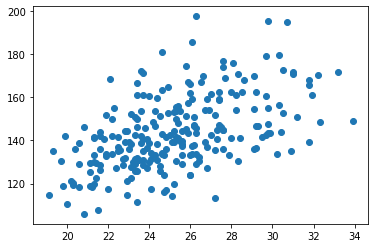

In [563]:
# correlation of BMI to FFM
plt.scatter(df['BMI'], df['FFM_Brozek'])

In [565]:
df[(df['Error'] < -8)]

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
4     1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
16    1.0333   34  195.75   71.00  38.9  101.9     96.4  105.2   64.8  40.8   
17    1.0468   32  209.25   71.00  42.1  107.6     97.5  107.0   66.9  40.0   
34    1.0263   41  247.25   73.50  42.1  117.0    115.6  116.1   71.2  43.3   
37    1.0346   50  196.75   68.25  42.1  105.6     98.8  104.8   66.0  41.5   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
246   1.0308   69  215.50   70.50  40.8  113.7    107.6  110.0   63.3  44.0   
248   1.0236   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249   1.0328   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250   1.0399   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251   1.0271   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  Error  \
4     24.0    32.2     27.7   17.7    27.8  25.6       133.1  28.7  -8.91   
16    23.1    36.2     30.8   17.3    28.1  27.3       140.8  29.0 -12.57   
17    24.4    38.2     31.6   19.3    22.4  29.2       162.5  22.9  -9.54   
34    26.3    37.3     31.7   19.7    31.1  32.2       170.4  32.3 -19.29   
37    24.7    33.2     30.5   19.4    27.5  29.7       142.6  28.4 -13.44   
..     ...     ...      ...    ...     ...   ...         ...   ...    ...   
246   22.6    37.5     32.6   18.8    29.1  30.5       152.7  30.2 -14.92   
248   23.2    35.2     28.6   20.1    32.3  29.1       136.1  33.6 -17.88   
249   21.5    31.3     27.2   18.0    28.3  30.2       133.9  29.3 -10.55   
250   22.7    30.5     29.4   19.8    25.3  27.0       142.6  26.0  -9.55   
251   24.6    33.7     30.0   20.9    30.7  29.8       143.7  31.9 -16.30   

     Wrist_Inches  Frame  Abs_chest_hips  Knee_Inches  HW_ratio  abs_weight  \
4            6.97    0.0        0.623053        16.61      0.98        0.54   
16           6.81    0.0        0.578284        16.06      0.92        0.49   
17           7.60    1.0        0.558739        15.75      0.91        0.47   
34           7.76    0.0        0.614240        17.05      1.00        0.47   
37           7.64    0.0        0.575758        16.34      0.94        0.50   
..            ...    ...             ...          ...       ...         ...   
246          7.40    NaN        0.607910        17.32      0.98        0.50   
248          7.91    NaN        0.624628        16.06      1.00        0.52   
249          7.09    NaN        0.650525        14.69      1.10        0.60   
250          7.80    NaN        0.616555        16.38      1.04        0.53   
251          8.23    NaN        0.631916        16.61      1.01        0.52   

     hip_weight  abs_height  thigh_hip  thigh_abs  chest_abs  
4          0.55        1.40       0.62       0.63       0.97  
16         0.54        1.36       0.62       0.67       1.06  
17         0.51        1.37       0.63       0.69       1.10  
34         0.47        1.57       0.61       0.62       1.01  
37         0.53        1.45       0.63       0.67       1.07  
..          ...         ...        ...        ...        ...  
246        0.51        1.53       0.58       0.59       1.06  
248        0.52        1.51       0.57       0.57       1.03  
249        0.54        1.69       0.59       0.54       1.00  
250        0.51        1.44       0.57       0.55       1.07  
251        0.52        1.55       0.55       0.55       1.04  

[62 rows x 30 columns]

In [566]:
df[(df['Error'] > -8) & (df['Error'] < 8)]

Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
2     1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
5     1.0502   24  210.25   74.75  39.0  104.5     94.4  107.8   66.0  42.0   
6     1.0549   26  181.00   69.75  36.4  105.1     90.7  100.3   58.4  38.3   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
233   1.0384   58  161.75   67.25  35.1   94.9     94.9  100.2   56.8  35.9   
235   1.0563   62  168.75   67.50  38.3  104.7     95.6   93.7   54.4  37.1   
238   1.0705   64  155.25   69.50  37.9   95.8     82.8   94.5   61.2  39.1   
240   1.0599   65  127.50   65.75  34.7   93.0     79.7   87.6   50.7  33.4   
245   1.0641   68  155.50   69.25  36.3   97.4     84.3   94.4   54.3  37.5   

     Ankle  Biceps  Forearm  Wrist  Brozek   BMI  FFM_Brozek  Siri  Error  \
0     21.9    32.0     27.4   17.1    12.6  23.7       134.9  12.3   6.48   
2     24.0    28.8     25.2   16.6    24.6  24.7       116.0  25.3  -3.20   
3     22.8    32.4     29.4   18.2    10.9  24.9       164.7  10.4   5.29   
5     25.6    35.7     30.6   18.8    20.6  26.5       167.0  20.9  -6.71   
6     22.9    31.9     27.8   17.7    19.0  26.2       146.6  19.2  -0.96   
..     ...     ...      ...    ...     ...   ...         ...   ...    ...   
233   21.0    27.8     26.1   17.6    25.9  25.2       119.9  26.7  -5.77   
235   22.7    30.3     26.3   18.3    18.4  26.1       137.6  18.6  -0.85   
238   22.3    29.8     28.9   18.3    12.7  22.6       135.5  12.4   4.28   
240   20.1    28.5     24.8   16.5    17.0  20.8       105.9  17.0   4.11   
245   22.6    29.2     27.3   18.5    15.3  22.8       131.8  15.2   3.03   

     Wrist_Inches  Frame  Abs_chest_hips  Knee_Inches  HW_ratio  abs_weight  \
0            6.73    0.0        0.560158        14.69      0.90        0.55   
2            6.54    0.0        0.565637        15.31      0.89        0.57   
3            7.17    0.0        0.533663        14.69      0.85        0.47   
5            7.40    0.0        0.553666        16.54      0.88        0.45   
6            6.97    0.0        0.554740        15.08      0.90        0.50   
..            ...    ...             ...          ...       ...         ...   
233          6.93    0.0        0.625577        14.13      0.95        0.59   
235          7.20    1.0        0.600880        14.61      1.02        0.57   
238          7.20    1.0        0.527389        15.39      0.88        0.53   
240          6.50    NaN        0.554628        13.15      0.91        0.63   
245          7.28    NaN        0.555702        14.76      0.89        0.54   

     hip_weight  abs_height  thigh_hip  thigh_abs  chest_abs  
0          0.61        1.26       0.62       0.69       1.09  
2          0.64        1.33       0.60       0.68       1.09  
3          0.55        1.20       0.59       0.70       1.18  
5          0.51        1.26       0.61       0.70       1.11  
6          0.55        1.30       0.58       0.64       1.16  
..          ...         ...        ...        ...        ...  
233        0.62        1.41       0.57       0.60       1.00  
235        0.56        1.42       0.58       0.57       1.10  
238        0.61        1.19       0.65       0.74       1.16  
240        0.69        1.21       0.58       0.64       1.17  
245        0.61        1.22       0.58       0.64       1.16  

[145 rows x 30 columns]

In [567]:
# Findings DoD underestimates low h/r and bmi, weight values 
# Dod overestimations have bmis higher than __ and h/r higher than __
# dod scores well on bmis around 24-26 and h/r 
# thigh/abs, chest/abs, biceps/abs all play a role
# men with higher actual BF than DOD had larger thighs 
# lower actual BFs had smaller thighs
# everything in ratio to abs (abs smaller = lower bf, abs equal = higher bf, abs bigger = lower bf )
# abdomen to wieght? low body fat will have a small waist but higher wieght and higher bf will have a larger waist with larger weight
# same with hips to weight depending on their waist to hip ratio

In [568]:
#heatmap/correlation
corr = abs(df.corr(method='pearson')) > 0.8
corr

Density    Age  Weight  Height   Neck  Chest  Abdomen    Hip  \
Density            True  False   False   False  False  False    False  False   
Age               False   True   False   False  False  False    False  False   
Weight            False  False    True   False  False   True     True   True   
Height            False  False   False    True  False  False    False  False   
Neck              False  False   False   False   True  False    False  False   
Chest             False  False    True   False  False   True     True  False   
Abdomen           False  False    True   False  False   True     True   True   
Hip               False  False    True   False  False  False     True   True   
Thigh             False  False    True   False  False  False    False   True   
Knee              False  False    True   False  False  False    False   True   
Ankle             False  False   False   False  False  False    False  False   
Biceps            False  False   False   False  False  False    False  False   
Forearm           False  False   False   False  False  False    False  False   
Wrist             False  False   False   False  False  False    False  False   
Brozek             True  False   False   False  False  False     True  False   
BMI               False  False    True   False  False   True     True   True   
FFM_Brozek        False  False   False   False  False  False    False  False   
Siri               True  False   False   False  False  False     True  False   
Error              True  False   False   False  False  False     True  False   
Wrist_Inches      False  False   False   False  False  False    False  False   
Frame             False  False   False   False  False  False    False  False   
Abs_chest_hips    False  False   False   False  False  False    False  False   
Knee_Inches       False  False    True   False  False  False    False   True   
HW_ratio          False  False   False   False  False  False     True  False   
abs_weight        False  False   False   False  False  False    False  False   
hip_weight        False  False    True   False  False   True     True   True   
abs_height         True  False   False   False  False   True     True  False   
thigh_hip         False  False   False   False  False  False    False  False   
thigh_abs         False  False   False   False  False  False    False  False   
chest_abs         False  False   False   False  False  False    False  False   

                Thigh   Knee  Ankle  Biceps  Forearm  Wrist  Brozek    BMI  \
Density         False  False  False   False    False  False    True  False   
Age             False  False  False   False    False  False   False  False   
Weight           True   True  False   False    False  False   False   True   
Height          False  False  False   False    False  False   False  False   
Neck            False  False  False   False    False  False   False  False   
Chest           False  False  False   False    False  False   False   True   
Abdomen         False  False  False   False    False  False    True   True   
Hip              True   True  False   False    False  False   False   True   
Thigh            True  False  False   False    False  False   False  False   
Knee            False   True  False   False    False  False   False  False   
Ankle           False  False   True   False    False  False   False  False   
Biceps          False  False  False    True    False  False   False  False   
Forearm         False  False  False   False     True  False   False  False   
Wrist           False  False  False   False    False   True   False  False   
Brozek          False  False  False   False    False  False    True  False   
BMI             False  False  False   False    False  False   False   True   
FFM_Brozek      False  False  False   False    False  False   False  False   
Siri            False  False  False   False    False  False    True  False   
Error           False  False  False   False    False 

In [569]:
#findings - maybe use hip, h/w, neck
## Results - hip/weight, chest/bmi
# we could potentially use the error or FFM as the dependent variable as well to get BF

In [616]:
#Create the df using to model
model_df = df.copy()

In [617]:
#remove density and unecessary columns... correlates with the Brozek score
model_df.drop(['Density', 'Wrist_Inches', 'Knee_Inches', 'FFM_Brozek'], axis=1, inplace=True)

In [618]:
#creating separate df for Error
error_df = model_df.copy()

In [619]:
abs(model_df.corr(method='spearman')) > 0.80

Age  Weight  Height   Neck  Chest  Abdomen    Hip  Thigh  \
Age              True   False   False  False  False    False  False  False   
Weight          False    True   False   True   True     True   True   True   
Height          False   False    True  False  False    False  False  False   
Neck            False    True   False   True  False    False  False  False   
Chest           False    True   False  False   True     True  False  False   
Abdomen         False    True   False  False   True     True   True  False   
Hip             False    True   False  False  False     True   True   True   
Thigh           False    True   False  False  False    False   True   True   
Knee            False    True   False  False  False    False   True  False   
Ankle           False   False   False  False  False    False  False  False   
Biceps          False   False   False  False  False    False  False  False   
Forearm         False   False   False  False  False    False  False  False   
Wrist           False   False   False  False  False    False  False  False   
Brozek          False   False   False  False  False    False  False  False   
BMI             False    True   False  False   True     True   True  False   
Siri            False   False   False  False  False    False  False  False   
Error           False   False   False  False  False     True  False  False   
Frame           False   False   False  False  False    False  False  False   
Abs_chest_hips  False   False   False  False  False    False  False  False   
HW_ratio        False   False   False  False  False     True  False  False   
abs_weight      False   False   False  False  False    False  False  False   
hip_weight      False    True   False  False   True     True   True  False   
abs_height      False   False   False  False   True     True  False  False   
thigh_hip       False   False   False  False  False    False  False  False   
thigh_abs       False   False   False  False  False    False  False  False   
chest_abs       False   False   False  False  False    False  False  False   

                 Knee  Ankle  Biceps  Forearm  Wrist  Brozek    BMI   Siri  \
Age             False  False   False    False  False   False  False  False   
Weight           True  False   False    False  False   False   True  False   
Height          False  False   False    False  False   False  False  False   
Neck            False  False   False    False  False   False  False  False   
Chest           False  False   False    False  False   False   True  False   
Abdomen         False  False   False    False  False   False   True  False   
Hip              True  False   False    False  False   False   True  False   
Thigh           False  False   False    False  False   False  False  False   
Knee             True  False   False    False  False   False  False  False   
Ankle           False   True   False    False  False   False  False  False   
Biceps          False  False    True    False  False   False  False  False   
Forearm         False  False   False     True  False   False  False  False   
Wrist           False  False   False    False   True   False  False  False   
Brozek          False  False   False    False  False    True  False   True   
BMI             False  False   False    False  False   False   True  False   
Siri            False  False   False    False  False    True  False   True   
Error           False  False   False    False  False    True  False   True   
Frame           False  False   False    False  False   False  False  False   
Abs_chest_hips  False  False   False    False  False   False  False  False   
HW_ratio        False  False   False    False  False   False  False  False   
abs_weight      False  False   False    False  False   False  False  False   
hip_weight      False  False   False    False  False   False   True  False   
abs_height      False  False   False    False  False    True   True   True   
thigh_hip       False  False   False   

In [574]:
## How do fat free weight and wrist measurement correlate?
## There is a previous correlation of 0.59 according to attached research paper
## According to the same paper, the knee measurement, which we have, had a correlation of 0.65 to FFM and 0.48 TBF and 0.71 Weight
## If the person has had a recent significant weight loss, using bone measurements would not be as accurate on them

In [575]:
## Remove older samples maybe having a lower bone density? Cannot remove if using previous research paper as they used samples from ages 18-65.


In [576]:
## skin estimated to be 16% of weight and intestines 7.5lbs
## https://www.livescience.com/32939-how-much-does-skin-weigh.html#:~:text=As%20an%20organ%2C%20skin%20is,a%20person's%20total%20body%20weight.&text=Most%20adults'%20skin%20weighs%20in%20at%2020%20pounds%20or%20more.
## other organs 9.3 pounds mean with no correlation to height weight or bmi of man, so the mean is the best fidure to use
## https://journals.lww.com/amjforensicmedicine/Abstract/2012/12000/Normal_Organ_Weights_in_Men__Part_II_The_Brain,.22.aspx#:~:text=The%20following%20reference%20ranges%20(95,the%20presence%20of%20pathologic%20disease.

In [577]:
## group the samples into error rates >8, <-8, 8>-8 -- then find similiarities or patterns

## Preprocessing

### Train/Test/Split

In [621]:
BF_df

Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
0     23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
1     22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
2     22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
3     26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   22.8   
4     24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   24.0   
..   ...     ...     ...   ...    ...      ...    ...    ...   ...    ...   
247   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   21.5   
248   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   23.2   
249   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   21.5   
250   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   22.7   
251   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   24.6   

     Biceps  Forearm  Wrist   BMI  Frame  Abs_chest_hips  HW_ratio  \
0      32.0     27.4   17.1  23.7    0.0        0.560158      0.90   
1      30.5     28.9   18.2  23.4    0.0        0.544977      0.84   
2      28.8     25.2   16.6  24.7    0.0        0.565637      0.89   
3      32.4     29.4   18.2  24.9    0.0        0.533663      0.85   
4      32.2     27.7   17.7  25.6    0.0        0.623053      0.98   
..      ...      ...    ...   ...    ...             ...       ...   
247    25.6     25.7   18.5  21.1    NaN        0.602305      0.94   
248    35.2     28.6   20.1  29.1    NaN        0.624628      1.00   
249    31.3     27.2   18.0  30.2    NaN        0.650525      1.10   
250    30.5     29.4   19.8  27.0    NaN        0.616555      1.04   
251    33.7     30.0   20.9  29.8    NaN        0.631916      1.01   

     abs_weight  hip_weight  abs_height  thigh_hip  thigh_abs  chest_abs  
0          0.55        0.61        1.26       0.62       0.69       1.09  
1          0.48        0.57        1.15       0.59       0.71       1.13  
2          0.57        0.64        1.33       0.60       0.68       1.09  
3          0.47        0.55        1.20       0.59       0.70       1.18  
4          0.54        0.55        1.40       0.62       0.63       0.97  
..          ...         ...         ...        ...        ...        ...  
247        0.62        0.66        1.25       0.56       0.59       1.07  
248        0.52        0.52        1.51       0.57       0.57       1.03  
249        0.60        0.54        1.69       0.59       0.54       1.00  
250        0.53        0.51        1.44       0.57       0.55       1.07  
251        0.52        0.52        1.55       0.55       0.55       1.04  

[239 rows x 23 columns]

In [620]:
## Split Training and Testing Data
from sklearn.model_selection import train_test_split

BF_df = model_df.copy()
y = BF_df[['Brozek']]
X = BF_df.drop(['Brozek', 'Error', 'Siri'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [614]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [615]:
## Split using Error as the dependent feature

err_y = error_df[['Error']]
err_X = error_df.drop(['Error','Brozek', 'Siri'], axis=1, inplace=True)
err_X_train, err_X_test, err_y_train, err_y_test = train_test_split(err_X, err_y, test_size=0.25, random_state=0)

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [ ]:
scale = MinMaxScaler()
err_X_train_scaled = scale.fit_transform(err_X_train)
err_X_test_scaled = scale.transform(err_X_test)

### Feature Selection

#### ERROR

In [612]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

ridge = Ridge(alpha=0.5)
ridge.fit(err_X_train_scaled, err_y_train)

lasso = Lasso(alpha=0.05)
lasso.fit(err_X_train_scaled, err_y_train)

lin = LinearRegression(alpha=0.05)
lin.fit(err_X_train_scaled, err_y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [601]:
err_y_h_ridge_train = ridge.predict(err_X_train_scaled)
err_y_h_ridge_test = ridge.predict(err_X_test_scaled)

err_y_h_lasso_train = np.reshape(lasso.predict(err_X_train_scaled), (188, 1))
err_y_h_lasso_test = np.reshape(lasso.predict(err_X_test_scaled), (63, 1))

err_y_h_lin_train = lin.predict(err_X_train_scaled)
err_y_h_lin_test = lin.predict(err_X_test_scaled)

NotFittedError: This Ridge instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print('Train Error Ridge Model', np.sum((err_y_train - err_y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((err_y_test - err_y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((err_y_train - err_y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((err_y_test - err_y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((err_y_train - lin.predict(err_X_train_scaled))**2))
print('Test Error Unpenalized Linear Model', np.sum((err_y_test - lin.predict(err_X_test_scaled))**2))

In [585]:
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)
print('Linear model parameter coefficients:', lin.coef_)

AttributeError: 'Ridge' object has no attribute 'coef_'

ridge = Ridge(alpha=0.5)
ridge.fit(err_X_train_scaled, err_y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(err_X_train_scaled, err_y_train)

lin = LinearRegression()
lin.fit(err_X_train_scaled, err_y_train)

In [ ]:
# Lassoed features - Weight, Height, Knee, hip/weight, abs/height, thigh/hip, chest/abs

In [ ]:
linear_Error = error_df[['Height', 'Knee', 'abs_height', 'thigh_hip', 'chest_abs']]
linear_Error.corr()
# Removed weight and hip_weight due to correlations and lower coefficients

In [ ]:
err_y = error_df[['Error']]
err_X = error_df[['Height', 'Knee', 'abs_height', 'thigh_hip', 'chest_abs']]
err_X_train, err_X_test, err_y_train, err_y_test = train_test_split(err_X, err_y, test_size=0.25, random_state=0)

In [ ]:
scale = MinMaxScaler()
err_X_train_scaled = scale.fit_transform(err_X_train)
err_X_test_scaled = scale.transform(err_X_test)


In [ ]:
ridge = Ridge(alpha=0.002)
ridge.fit(err_X_train_scaled, err_y_train)

lasso = Lasso(alpha=0.002)
lasso.fit(err_X_train_scaled, err_y_train)

lin = LinearRegression()
lin.fit(err_X_train_scaled, err_y_train)

In [ ]:
err_y_h_ridge_train = ridge.predict(err_X_train_scaled)
err_y_h_ridge_test = ridge.predict(err_X_test_scaled)

err_y_h_lasso_train = np.reshape(lasso.predict(err_X_train_scaled), (188, 1))
err_y_h_lasso_test = np.reshape(lasso.predict(err_X_test_scaled), (63, 1))

err_y_h_lin_train = lin.predict(err_X_train_scaled)
err_y_h_lin_test = lin.predict(err_X_test_scaled)

In [ ]:
print('Train Error Ridge Model', np.sum((err_y_train - err_y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((err_y_test - err_y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((err_y_train - err_y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((err_y_test - err_y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((err_y_train - lin.predict(err_X_train_scaled))**2))
print('Test Error Unpenalized Linear Model', np.sum((err_y_test - lin.predict(err_X_test_scaled))**2))

In [ ]:
#Linear regression test and training score
print('Training r^2:', lin.score(err_X_train_scaled, err_y_train))
print('Test r^2:', lin.score(err_X_test_scaled, err_y_test))

#### Bodyfat

In [ ]:
ridge = Ridge(alpha=0.05)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.05)
lasso.fit(X_train_scaled, y_train)

lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

In [ ]:
y_h_ridge_train = ridge.predict(X_train_scaled)
y_h_ridge_test = ridge.predict(X_test_scaled)

y_h_lasso_train = np.reshape(lasso.predict(X_train_scaled), (189, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_scaled), (63, 1))

y_h_lin_train = lin.predict(X_train_scaled)
y_h_lin_test = lin.predict(X_test_scaled)

In [ ]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_scaled))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_scaled))**2))

In [ ]:
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)
print('Linear model parameter coefficients:', lin.coef_)

In [ ]:
# Lasso Features - Chest, Biceps, Wrist, H/W ratio, abs/height, thigh/hip, chest/abs

In [ ]:
linear_BF = BF_df[['Biceps', 'Wrist', 'HW_ratio', 'abs_height', 'thigh_hip', 'chest_abs']]
linear_BF.corr()


In [ ]:
z = err_X['Abdomen']
d = err_y['Error']

In [ ]:
cor_matrix = np.corrcoef(z, d)
print(cor_matrix[0,1])

## Modeling

In [ ]:
x_col = list(X.columns)

In [ ]:
from statsmodels.formula.api import ols


# Fitting the actual model
for x in x_col:
    predictors = x
    outcome = 'BF_Brozek'
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=BF_df).fit()
    print(model.summary())

In [ ]:
# Fitting the actual model
for x in x_col:
    predictors = x
    outcome = 'Error'
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=error_df).fit()
    print(model.summary())

In [ ]:
predictors = '+'.join(['Biceps', 'Wrist', 'HW_ratio', 'abs_height', 'thigh_hip', 'chest_abs'])
outcome = 'BF_Brozek'
formula = outcome + '~' + predictors
model = ols(formula=formula, data=BF_df).fit()
print(model.summary())

In [ ]:
predictors = '+'.join(['Height', 'Knee', 'abs_height', 'thigh_hip', 'chest_abs'])
outcome = 'Error'
formula = outcome + '~' + predictors
model = ols(formula=formula, data=error_df).fit()
print(model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xv = model_df[x_col].drop(['Height', 'Age', 'Frame', 'Thigh', 'hip_weight', 'thigh_abs', 'Abdomen', 'Hip', 'Weight', 'abs_weight', 'thigh_hip', 'Wrist', 'Neck', 'Knee', 'Chest', 'Forearm'], axis=1)
vif = [variance_inflation_factor(Xv.values, i) for i in range(Xv.shape[1])]
list(zip(Xv.columns, vif))

### Linear Regresssion

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg_all = LinearRegression()
linreg_all.fit(X_train, y_train)

print('Training r^2:', linreg_all.score(X_train, y_train))
print('Test r^2:', linreg_all.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, linreg_all.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, linreg_all.predict(X_test)))

In [ ]:
linreg_preds = linreg_all.predict(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg_all = LinearRegression()
linreg_all.fit(err_X_train, err_y_train)

print('Training r^2:', linreg_all.score(err_X_train, err_y_train))
print('Test r^2:', linreg_all.score(err_X_test, err_y_test))
print('Training MSE:', mean_squared_error(err_y_train, linreg_all.predict(err_X_train)))
print('Test MSE:', mean_squared_error(err_y_test, linreg_all.predict(err_X_test)))

### Random Forest Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [ ]:
RandomForestRegressor(max_depth=6, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=150)

In [ ]:
tree_clf = RandomForestRegressor(n_estimators=150, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=0) 
tree_clf.fit(err_X_train, err_y_train)

In [ ]:
y_pred = tree_clf.predict(err_X_test)
y_pred

In [ ]:
mse = mean_squared_error(err_y_test, y_pred)
r2 = r2_score(err_y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
print(r2)

In [ ]:
tree_clf.feature_importances_

In [ ]:
def plot_feature_importances(model):
    n_features = err_X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), err_X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [ ]:
# Test set predictions
pred = tree_clf.predict(err_X_test)

# Regression report
print(tree_clf.score(err_X, err_y))


In [ ]:
print(tree_clf.get_params)

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(tree_clf.get_params())

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR

In [ ]:
## Split using Error as the dependent feature

err_y = error_df['Error']
err_X = error_df[['Weight', 'Height', 'Knee', 'hip_weight', 'abs_height', 'thigh_hip', 'chest_abs']]
err_X_train, err_X_test, err_y_train, err_y_test = train_test_split(err_X, err_y, test_size=0.2, random_state=0)

In [ ]:
param_grid={
            'max_depth': range(3,12),
            'n_estimators': (10, 20, 30, 40, 50, 60, 70, 80, 90),
            'min_samples_split': (2,3,4),
            'bootstrap': [True],
            'max_samples': (30,40),
        },

In [ ]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),
        param_grid = param_grid,
        verbose=0, cv=8)

In [ ]:
grid_result = gsc.fit(err_X_train, err_y_train)
best_params = grid_result.best_params_
grid_result.best_score_

In [ ]:
best_params

In [ ]:
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], min_samples_split=best_params["min_samples_split"], random_state=0, verbose=0)

In [ ]:
rfr_cval_score = cross_val_score(rfr, err_X_train, err_y_train, cv=8)
mean_rfr_cval_score = rfr_cval_score.mean()
print(mean_rfr_cval_score)

In [ ]:
rfr_errors_predictions = grid_result.predict(err_X_test)
rfr_errors_scores = abs(rfr_errors_predictions - err_y_test)
total_rfr_error = sum(rfr_errors_scores)
max_rfr_error = max(rfr_errors_scores)
print(total_rfr_error)
print(max_rfr_error)

In [ ]:
rfr_errors_predictions = model.predict(err_X_test)
rfr_errors_score = abs(rfr_errors_predictions - err_y_test)
sum(rfr_errors_score)/62
max(rfr_errors_score)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:

#rf = RandomForestRegressor()

#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)

#rf_random.fit(err_X_train, err_y_train)

In [ ]:
#rf_random.best_params_

In [ ]:
# a separate parameter grid with more options, personal use

param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 6, 7, 8],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150]


### XgB Regressor

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [ ]:
xgbr1 = xgb.XGBRegressor(verbosity=0)
xgbr1.fit(X_train, y_train)
score1 = xgbr1.score(X_train, y_train)
score2 = xgbr1.score(X_test, y_test)
score1

In [ ]:
ypred1 = xgbr1.predict(X_test)
mse1 = mean_squared_error(y_test, ypred1)
print("MSE: %.2f" % mse1)

print("RMSE: %.2f" % (mse1*(1/2.0)))

In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

In [ ]:
xgbr.fit(err_X_train, err_y_train)

In [ ]:
score = xgbr.score(err_X_train, err_y_train)  
print("Training score: ", score)


In [ ]:
scores = cross_val_score(xgbr, err_X_train, err_y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, err_X_train, err_y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
ypred = xgbr.predict(err_X_test)
mse = mean_squared_error(err_y_test, ypred)
print("MSE: %.2f" % mse)

print("RMSE: %.2f" % (mse*(1/2.0)))


In [ ]:
x_ax = range(len(err_y_test))
plt.plot(x_ax, err_y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Real vs Predicted")
plt.legend()
plt.show()

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

%matplotlib inline

In [ ]:
rfc=RandomForestRegressor(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(err_X_train, err_y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8)
rfc1.fit(err_X_train, err_y_train)

In [ ]:
pred=rfc1.predict(err_X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(err_y_test,pred))

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem" data-toc-modified-id="Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Creating-the-Dataset" data-toc-modified-id="Creating-the-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating the Dataset</a></span></li><li><span><a href="#Checking-Data-Integrity" data-toc-modified-id="Checking-Data-Integrity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking Data Integrity</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Train/Test/Split" data-toc-modified-id="Train/Test/Split-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Train/Test/Split</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#ERROR" data-toc-modified-id="ERROR-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>ERROR</a></span></li><li><span><a href="#Bodyfat" data-toc-modified-id="Bodyfat-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Bodyfat</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regresssion" data-toc-modified-id="Linear-Regresssion-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Linear Regresssion</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#XgB-Regressor" data-toc-modified-id="XgB-Regressor-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>XgB Regressor</a></span></li></ul></li></ul></div>